# Data Analysis Using Python: A Beginner’s Guide Featuring NYC Open Data  
## Part 4: Working with geospatial data and mapping

Mark Bauer

Table of Contents
=================

   1. Importing Libraries 
   2. Reading and Writing Files
       * 2.1 Reading Spatial Data
       * 2.2 Writing Spatial Data   
   3. Data Structures
       * 3.1 GeoSeries
       * 3.2 GeoDataFrame 
   4. Attributes and Methods
       * 4.1 Basic Attributes
       * 4.2 Basic Methods
       * 4.3 Create Centroids from Polygons
       * 4.4 Creating a GeoDataFrame from a DataFrame with Coordinates
   5. Making Maps
       * 5.1 Points
       * 5.2 Lines
       * 5.3 Polygons
       * 5.4 Maps with Layers
       * 5.5 Adding Background Map
       * 5.6 Clip Data
   6. Joining Data
       * 6.1 Attribute Join
       * 6.2 Spatial Join
   7. Indexing and Selecting Data
   8. Coordinate Reference Systems
   9. Types of Maps
       * 9.1 Choropleth Maps
       * 9.2 Hexbin Map
       * 9.3 Proportional Symbol Map
   10. Relationship Tests  
   11. Set Operations with Overlay  
       * 11.1 Union
       * 11.2 Intersection
       * 11.3 Symmetric Difference
       * 11.4 Difference
       * 11.5 Identity
       * 11.6 Aggregation with Dissolve
   12. Additional Attributes and Methods  
       * 12.1 Unary Predicates
       * 12.2 Binary Predicates
           * 12.2.1 Centroids vs. Representative Points
       * 12.3 Constructive Methods
           * 12.3.1 Buffer
           * 12.3.2 Translate/Offset        
   13. Conclusion


**Goal:** In this notebook, we will review various workflows of working with geospatial data and mapping.

**Main Libraries:**  
[GeoPandas](https://geopandas.org/index.html) is an open source project to make working with geospatial data in python easier. GeoPandas extends the datatypes used by pandas to allow spatial operations on geometric types. Geometric operations are performed by shapely. Geopandas further depends on fiona for file access and descartes and matplotlib for plotting.  
[Matplotlib](https://matplotlib.org/3.1.1/index.html#) is a Python 2D plotting library which produces publication quality figures in a variety of hardcopy formats and interactive environments across platforms.  
[Seaborn](https://seaborn.pydata.org/index.html) is a Python data visualization library based on matplotlib. It provides a high-level interface for drawing attractive and informative statistical graphics.  
[pandas](https://pandas.pydata.org/) is a fast, powerful, flexible and easy to use open source data analysis and manipulation tool, built on top of the Python programming language.

**Datasets:**  
Schools: https://data.cityofnewyork.us/Education/School-Point-Locations/jfju-ynrr  
Streets: https://data.cityofnewyork.us/City-Government/NYC-Street-Centerline-CSCL-/exjm-f27b  
Streets: https://data.cityofnewyork.us/City-Government/NYC-Street-Centerline-CSCL-/exjm-f27b

# 1. Importing Libraries

In [1]:
# importing libraries
import pandas as pd
import numpy as np
import seaborn as sns
import geopandas as gpd
import matplotlib.pyplot as plt
from matplotlib.ticker import FuncFormatter
import matplotlib.patheffects as pe
from mpl_toolkits.axes_grid1 import make_axes_locatable
import contextily as ctx
from shapely.geometry import Point

Printing verions of Python modules and packages with **watermark** - the IPython magic extension.  
Documention for installing watermark: https://github.com/rasbt/watermark

In [2]:
%reload_ext watermark
%watermark -v -p numpy,pandas,geopandas,matplotlib

Python implementation: CPython
Python version       : 3.8.13
IPython version      : 8.4.0

numpy     : 1.22.4
pandas    : 1.4.2
geopandas : 0.9.0
matplotlib: 3.5.2



# 2. Reading and Writing Files

## 2.1 Reading Spatial Data

In [3]:
# saving neighborhood tabulation areas (nta) file link as 'path'
path = 'https://services5.arcgis.com/GfwWNkhOj9bNBqoJ/arcgis/rest/services/NYC_Neighborhood_Tabulation_Areas_2010\
/FeatureServer/0/query?where=1=1&outFields=*&outSR=4326&f=pgeojson'
nta_shape = gpd.read_file(path)

# sanity check
print('shape of data: {}'.format(nta_shape.shape))
nta_shape.head()

shape of data: (195, 9)


,OBJECTID,BoroCode,BoroName,CountyFIPS,NTACode,NTAName,Shape__Area,Shape__Length,geometry
0,1,4,Queens,081,QN08,St. Albans,7.741276e+07,45401.225082,"POLYGON ((-73.75205 40.70524, -73.75175 40.704..."
1,2,2,Bronx,005,BX28,Van Cortlandt Village,2.566604e+07,21945.694919,"POLYGON ((-73.88705 40.88436, -73.88705 40.884..."
2,3,4,Queens,081,QN55,South Ozone Park,8.246139e+07,36708.169305,"POLYGON ((-73.80577 40.68294, -73.80552 40.682..."
3,4,3,Brooklyn,047,BK40,Windsor Terrace,1.404173e+07,19033.464627,"POLYGON ((-73.98017 40.66116, -73.98021 40.661..."
4,5,3,Brooklyn,047,BK50,Canarsie,8.208973e+07,43703.354933,"MULTIPOLYGON (((-73.88834 40.64672, -73.88835 ..."


In [4]:
# saving school points shapefile link as 'path'
path = 'https://data.cityofnewyork.us/download/jfju-ynrr/application%2Fzip'
school_points = gpd.read_file(path) 

# sanity check
print('shape of data: {}'.format(school_points.shape))
school_points.head()

shape of data: (1709, 18)


,ATS_CODE,BORO,BORONUM,LOC_CODE,SCHOOLNAME,SCH_TYPE,MANAGED_BY,GEO_DISTRI,ADMIN_DIST,ADDRESS,STATE_CODE,ZIP,PRINCIPAL,PRIN_PH,FAX,GRADES,City,geometry
0,15K001,K,2.0,K001,P.S. 001 THE BERGEN,Elementary,1,15,15,309 47 STREET,NY,11220,Jennifer Eusanio,718-567-7661,718-567-9771,"PK,0K,01,02,03,04,05,SE",BROOKLYN,POINT (980985.054 175780.759)
1,17K002,K,2.0,K002,M.S. 002,Junior High-Intermediate-Middle,1,17,17,655 PARKSIDE AVENUE,NY,11226,ADRIENNE SPENCER,718-462-6992,718-284-7717,"06,07,08,SE",BROOKLYN,POINT (997785.136 178431.911)
2,21K095,K,2.0,K095,P.S. 095 THE GRAVESEND,K-8,1,21,21,345 VAN SICKLEN STREET,NY,11223,Janet Ndzibah,718-449-5050,718-449-3047,"PK,0K,01,02,03,04,05,06,07,08,SE",BROOKLYN,POINT (991224.983 156323.361)
3,21K096,K,2.0,K096,I.S. 096 SETH LOW,Junior High-Intermediate-Middle,1,21,21,99 AVENUE P,NY,11204,Denise Sandra Levinsky,718-236-1344,718-236-2397,"06,07,08,SE",BROOKLYN,POINT (988439.681 160709.993)
4,21K097,K,2.0,K097,P.S. 97 THE HIGHLAWN,Elementary,1,21,21,1855 STILLWELL AVENUE,NY,11223,KRISTINE MUSTILLO,718-372-7393,718-372-3842,"PK,0K,01,02,03,04,05,SE",BROOKLYN,POINT (988205.073 158329.591)


## 2.2 Writing Spatial Data

In [5]:
# Writing nta file to Shapefile foramt
nta_shape.to_file("data/nta_shape.shp", index=False)

# Writing nta file to GeoJSON format
nta_shape.to_file("data/nta_shape.geojson", driver='GeoJSON', index=False)

/var/folders/nt/dw7y_xj95mv6nrk00x5xkk2w0000gn/T/ipykernel_37299/2329375598.py:2: UserWarning: Column names longer than 10 characters will be truncated when saved to ESRI Shapefile.
  nta_shape.to_file("data/nta_shape.shp", index=False)


# 3. Data Structures

## 3.1 GeoSeries

In [6]:
# returning the type of a column in our dataframe
type(nta_shape['geometry'])

geopandas.geoseries.GeoSeries

## 3.2 GeoDataFrame

In [7]:
# returning the type of our data in our dataframe
type(nta_shape)

geopandas.geodataframe.GeoDataFrame

# 4. Attributes and Methods

## 4.1 Basic Attributes

In [8]:
path = 'https://services5.arcgis.com/GfwWNkhOj9bNBqoJ/arcgis/rest/services/NYC_Neighborhood_Tabulation_Areas_2010\
/FeatureServer/0/query?where=1=1&outFields=*&outSR=4326&f=pgeojson'
nta_shape = gpd.read_file(path)

print('shape of data: {}'.format(nta_shape.shape))
nta_shape.head()

shape of data: (195, 9)


,OBJECTID,BoroCode,BoroName,CountyFIPS,NTACode,NTAName,Shape__Area,Shape__Length,geometry
0,1,4,Queens,081,QN08,St. Albans,7.741276e+07,45401.225082,"POLYGON ((-73.75205 40.70524, -73.75175 40.704..."
1,2,2,Bronx,005,BX28,Van Cortlandt Village,2.566604e+07,21945.694919,"POLYGON ((-73.88705 40.88436, -73.88705 40.884..."
2,3,4,Queens,081,QN55,South Ozone Park,8.246139e+07,36708.169305,"POLYGON ((-73.80577 40.68294, -73.80552 40.682..."
3,4,3,Brooklyn,047,BK40,Windsor Terrace,1.404173e+07,19033.464627,"POLYGON ((-73.98017 40.66116, -73.98021 40.661..."
4,5,3,Brooklyn,047,BK50,Canarsie,8.208973e+07,43703.354933,"MULTIPOLYGON (((-73.88834 40.64672, -73.88835 ..."


In [9]:
# returns the object's Coordinate Reference System (CRS)
nta_shape.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World.
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

In [10]:
# changing the CRS to 2263
nta_shape = nta_shape.to_crs(epsg=2263)

nta_shape.crs

<Derived Projected CRS: EPSG:2263>
Name: NAD83 / New York Long Island (ftUS)
Axis Info [cartesian]:
- X[east]: Easting (US survey foot)
- Y[north]: Northing (US survey foot)
Area of Use:
- name: United States (USA) - New York - counties of Bronx; Kings; Nassau; New York; Queens; Richmond; Suffolk.
- bounds: (-74.26, 40.47, -71.8, 41.3)
Coordinate Operation:
- name: SPCS83 New York Long Island zone (US Survey feet)
- method: Lambert Conic Conformal (2SP)
Datum: North American Datum 1983
- Ellipsoid: GRS 1980
- Prime Meridian: Greenwich

In [11]:
# returning the geometry column name of our dataframe
nta_shape.geometry.name

'geometry'

In [12]:
(nta_shape
 .centroid
 .head()
)

0    POINT (1049933.341 191191.777)
1    POINT (1013114.881 258635.540)
2    POINT (1034328.081 185672.744)
3     POINT (990358.891 177408.685)
4    POINT (1012072.697 171751.428)
dtype: geometry

In [13]:
# returns the area of each geometry in our dataframe
(nta_shape
 .area
 .head()
)

0    7.741295e+07
1    2.566605e+07
2    8.246163e+07
3    1.404178e+07
4    8.208999e+07
dtype: float64

In [14]:
# returns the length of each geometry in our dataframe
(nta_shape
 .length
 .head()
)

0    45401.271303
1    21945.694619
2    36708.218998
3    19033.500083
4    43703.421191
dtype: float64

In [15]:
# returns the bounds of each geometry in our dataframe
(nta_shape
 .bounds
 .head()
)

,minx,miny,maxx,maxy
0,1.044355e+06,184845.847546,1.055350e+06,197904.544570
1,1.010224e+06,254830.689838,1.015865e+06,262075.340832
2,1.028591e+06,180690.523595,1.039416e+06,191431.566693
3,9.874593e+05,174203.385600,9.923413e+05,180516.045092
4,1.006464e+06,166079.738521,1.018348e+06,178005.554247


In [16]:
# returns the values for the bounds of the series as a whole
nta_shape.total_bounds

array([ 913174.90970924,  120131.46029321, 1067382.17172758,
        272847.44352012])

In [17]:
# returning the type of geometries
(nta_shape
 .geom_type
 .head()
)

0         Polygon
1         Polygon
2         Polygon
3         Polygon
4    MultiPolygon
dtype: object

In [18]:
# returning valid geometry
(nta_shape
 .is_valid
 .head()
)

0    True
1    True
2    True
3    True
4    True
dtype: bool

In [19]:
path = 'https://data.cityofnewyork.us/download/jfju-ynrr/application%2Fzip'
school_points = gpd.read_file(path) 

print('shape of data: {}'.format(school_points.shape))
school_points.head()

shape of data: (1709, 18)


,ATS_CODE,BORO,BORONUM,LOC_CODE,SCHOOLNAME,SCH_TYPE,MANAGED_BY,GEO_DISTRI,ADMIN_DIST,ADDRESS,STATE_CODE,ZIP,PRINCIPAL,PRIN_PH,FAX,GRADES,City,geometry
0,15K001,K,2.0,K001,P.S. 001 THE BERGEN,Elementary,1,15,15,309 47 STREET,NY,11220,Jennifer Eusanio,718-567-7661,718-567-9771,"PK,0K,01,02,03,04,05,SE",BROOKLYN,POINT (980985.054 175780.759)
1,17K002,K,2.0,K002,M.S. 002,Junior High-Intermediate-Middle,1,17,17,655 PARKSIDE AVENUE,NY,11226,ADRIENNE SPENCER,718-462-6992,718-284-7717,"06,07,08,SE",BROOKLYN,POINT (997785.136 178431.911)
2,21K095,K,2.0,K095,P.S. 095 THE GRAVESEND,K-8,1,21,21,345 VAN SICKLEN STREET,NY,11223,Janet Ndzibah,718-449-5050,718-449-3047,"PK,0K,01,02,03,04,05,06,07,08,SE",BROOKLYN,POINT (991224.983 156323.361)
3,21K096,K,2.0,K096,I.S. 096 SETH LOW,Junior High-Intermediate-Middle,1,21,21,99 AVENUE P,NY,11204,Denise Sandra Levinsky,718-236-1344,718-236-2397,"06,07,08,SE",BROOKLYN,POINT (988439.681 160709.993)
4,21K097,K,2.0,K097,P.S. 97 THE HIGHLAWN,Elementary,1,21,21,1855 STILLWELL AVENUE,NY,11223,KRISTINE MUSTILLO,718-372-7393,718-372-3842,"PK,0K,01,02,03,04,05,SE",BROOKLYN,POINT (988205.073 158329.591)


In [20]:
# returns the x-coordinate of each geometry
school_points['geometry'].x

0       9.809851e+05
1       9.977851e+05
2       9.912250e+05
3       9.884397e+05
4       9.882051e+05
            ...     
1704    1.000975e+06
1705    1.027677e+06
1706    1.008200e+06
1707    1.008240e+06
1708    1.006497e+06
Length: 1709, dtype: float64

In [21]:
# returns the y-coordinate of each geometry
school_points['geometry'].y

0       175780.758994
1       178431.910832
2       156323.361213
3       160709.992624
4       158329.591337
            ...      
1704    216289.828741
1705    251468.397826
1706    259137.236530
1707    259105.896860
1708    235553.859500
Length: 1709, dtype: float64

## 4.2 Basic Methods

In [22]:
# Met Museum coordinates
metmuseum = (
    gpd.GeoSeries(
        Point(-73.96381364165454, 40.77933770631253), crs=4326)
    .to_crs(school_points.crs)
)

# preview location
metmuseum

0    POINT (994271.786 223212.846)
dtype: geometry

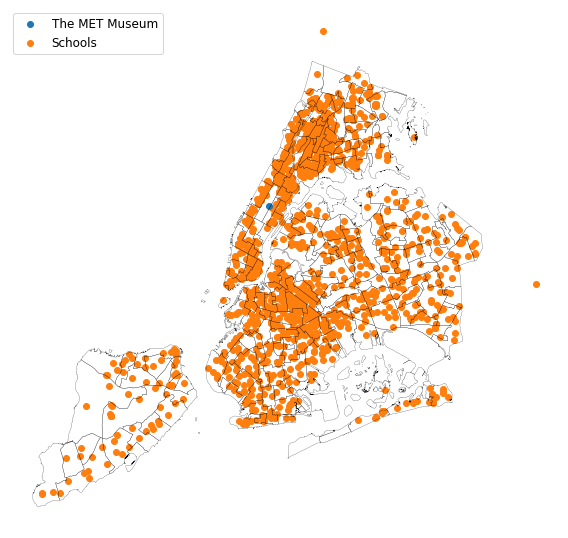

In [23]:
fig, ax = plt.subplots(figsize=(8, 8))

metmuseum.plot(ax=ax, label='The MET Museum')
school_points.plot(ax=ax, zorder=0, label='Schools')
nta_shape.plot(ax=ax, facecolor='None', linewidth=.2)

plt.legend(loc=2, fontsize='large')
ax.axis('off')
plt.tight_layout()

In [24]:
# distance of schools to MET Museum
school_points.distance(metmuseum[0])

0       49257.894040
1       44918.546026
2       66958.839427
3       62774.358790
4       65166.262284
            ...     
1704     9636.340643
1705    43752.255154
1706    38529.867837
1707    38515.153909
1708    17371.221171
Length: 1709, dtype: float64

In [25]:
# returns a centroid that is guaranteed to be within the geometry
(nta_shape
 .representative_point()
 .head()
)

/Users/markbauer/opt/anaconda3/envs/geopandas_env/lib/python3.8/site-packages/geopandas/array.py:524: ShapelyDeprecationWarning: The array interface is deprecated and will no longer work in Shapely 2.0. Convert the '.coords' to a numpy array instead.
  return GeometryArray(vectorized.representative_point(self.data), crs=self.crs)


0    POINT (1050079.414 191562.976)
1    POINT (1012888.755 258445.675)
2    POINT (1034034.975 186005.985)
3     POINT (990565.087 177427.956)
4    POINT (1012065.910 172056.304)
dtype: geometry

In [26]:
# printing the current CRS of the nta
print("Old CRS: {}".format(nta_shape.crs))

# changing and printing the CRS to '4326'
print("New CRS: {}".format(nta_shape.to_crs(epsg=4326).crs))

Old CRS: epsg:2263
New CRS: epsg:4326


<AxesSubplot:>

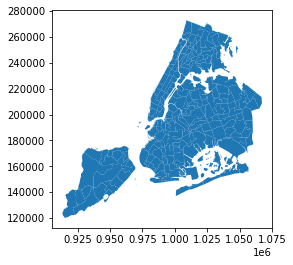

In [27]:
# plotting the geodataframe
nta_shape.plot()

<AxesSubplot:>

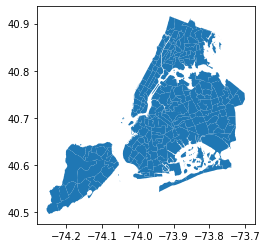

In [28]:
# changing the CRS and then plotting the geodataframe
(nta_shape
 .to_crs(epsg=4326)
 .plot()
)

## 4.3 Create Centroids from Polygons

<AxesSubplot:>

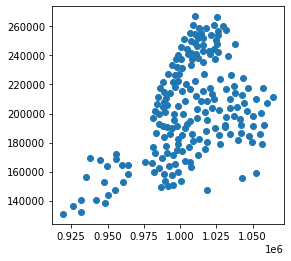

In [29]:
# returning the centroid of our shape and saving as a new column called 'centroid_column'
nta_shape['centroid_column'] = nta_shape.centroid

# setting our geometry as the new centroid column and then plotting 
(nta_shape
 .set_geometry('centroid_column')
 .plot()
)

## 4.4 Creating a GeoDataFrame from a DataFrame with Coordinates

In [30]:
path = 'https://services5.arcgis.com/GfwWNkhOj9bNBqoJ/arcgis/rest/services/NYC_Neighborhood_Tabulation_Areas_2010\
/FeatureServer/0/query?where=1=1&outFields=*&outSR=4326&f=pgeojson'
nta_shape = gpd.read_file(path)

print('shape of data: {}'.format(nta_shape.shape))
nta_shape.head()

shape of data: (195, 9)


,OBJECTID,BoroCode,BoroName,CountyFIPS,NTACode,NTAName,Shape__Area,Shape__Length,geometry
0,1,4,Queens,081,QN08,St. Albans,7.741276e+07,45401.225082,"POLYGON ((-73.75205 40.70524, -73.75175 40.704..."
1,2,2,Bronx,005,BX28,Van Cortlandt Village,2.566604e+07,21945.694919,"POLYGON ((-73.88705 40.88436, -73.88705 40.884..."
2,3,4,Queens,081,QN55,South Ozone Park,8.246139e+07,36708.169305,"POLYGON ((-73.80577 40.68294, -73.80552 40.682..."
3,4,3,Brooklyn,047,BK40,Windsor Terrace,1.404173e+07,19033.464627,"POLYGON ((-73.98017 40.66116, -73.98021 40.661..."
4,5,3,Brooklyn,047,BK50,Canarsie,8.208973e+07,43703.354933,"MULTIPOLYGON (((-73.88834 40.64672, -73.88835 ..."


In [31]:
# creating colums for the x and y coordinates of our geometries and deleting previous geometries
nta_shape['x'] = nta_shape.centroid.x
nta_shape['y'] = nta_shape.centroid.y
nta_shape_no_geometry = nta_shape.loc[:, ['NTAName', 'x', 'y']]

nta_shape_no_geometry.head()

/var/folders/nt/dw7y_xj95mv6nrk00x5xkk2w0000gn/T/ipykernel_37299/2919160559.py:2: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  nta_shape['x'] = nta_shape.centroid.x
/var/folders/nt/dw7y_xj95mv6nrk00x5xkk2w0000gn/T/ipykernel_37299/2919160559.py:3: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  nta_shape['y'] = nta_shape.centroid.y


,NTAName,x,y
0,St. Albans,-73.763147,40.691210
1,Van Cortlandt Village,-73.895624,40.876522
2,South Ozone Park,-73.819461,40.676164
3,Windsor Terrace,-73.977984,40.653620
4,Canarsie,-73.899752,40.638051


In [32]:
# Generate GeometryArray of point geometries from x, y coordinates
nta_shape_with_geometry = gpd.GeoDataFrame(
    nta_shape_no_geometry,
    geometry=gpd.points_from_xy(
        nta_shape_no_geometry['x'],
        nta_shape_no_geometry['y'])
)

# previewing our new point geometry column
nta_shape_with_geometry.head()

/Users/markbauer/opt/anaconda3/envs/geopandas_env/lib/python3.8/site-packages/geopandas/array.py:275: ShapelyDeprecationWarning: The array interface is deprecated and will no longer work in Shapely 2.0. Convert the '.coords' to a numpy array instead.
  return GeometryArray(vectorized.points_from_xy(x, y, z), crs=crs)


,NTAName,x,y,geometry
0,St. Albans,-73.763147,40.691210,POINT (-73.76315 40.69121)
1,Van Cortlandt Village,-73.895624,40.876522,POINT (-73.89562 40.87652)
2,South Ozone Park,-73.819461,40.676164,POINT (-73.81946 40.67616)
3,Windsor Terrace,-73.977984,40.653620,POINT (-73.97798 40.65362)
4,Canarsie,-73.899752,40.638051,POINT (-73.89975 40.63805)


<AxesSubplot:>

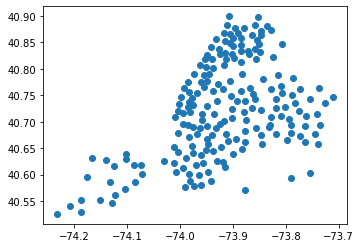

In [33]:
# plotting our data
nta_shape_with_geometry.plot()

# 5. Making Maps

GeoPandas has three basic classes of geometric objects (which are actually shapely objects):

- Points / Multi-Points

- Lines / Multi-Lines

- Polygons / Multi-Polygons

## 5.1 Points

In [34]:
path = 'https://data.cityofnewyork.us/download/jfju-ynrr/application%2Fzip'
school_points = gpd.read_file(path)

print('shape of data: {}'.format(school_points.shape))
school_points.head()

shape of data: (1709, 18)


,ATS_CODE,BORO,BORONUM,LOC_CODE,SCHOOLNAME,SCH_TYPE,MANAGED_BY,GEO_DISTRI,ADMIN_DIST,ADDRESS,STATE_CODE,ZIP,PRINCIPAL,PRIN_PH,FAX,GRADES,City,geometry
0,15K001,K,2.0,K001,P.S. 001 THE BERGEN,Elementary,1,15,15,309 47 STREET,NY,11220,Jennifer Eusanio,718-567-7661,718-567-9771,"PK,0K,01,02,03,04,05,SE",BROOKLYN,POINT (980985.054 175780.759)
1,17K002,K,2.0,K002,M.S. 002,Junior High-Intermediate-Middle,1,17,17,655 PARKSIDE AVENUE,NY,11226,ADRIENNE SPENCER,718-462-6992,718-284-7717,"06,07,08,SE",BROOKLYN,POINT (997785.136 178431.911)
2,21K095,K,2.0,K095,P.S. 095 THE GRAVESEND,K-8,1,21,21,345 VAN SICKLEN STREET,NY,11223,Janet Ndzibah,718-449-5050,718-449-3047,"PK,0K,01,02,03,04,05,06,07,08,SE",BROOKLYN,POINT (991224.983 156323.361)
3,21K096,K,2.0,K096,I.S. 096 SETH LOW,Junior High-Intermediate-Middle,1,21,21,99 AVENUE P,NY,11204,Denise Sandra Levinsky,718-236-1344,718-236-2397,"06,07,08,SE",BROOKLYN,POINT (988439.681 160709.993)
4,21K097,K,2.0,K097,P.S. 97 THE HIGHLAWN,Elementary,1,21,21,1855 STILLWELL AVENUE,NY,11223,KRISTINE MUSTILLO,718-372-7393,718-372-3842,"PK,0K,01,02,03,04,05,SE",BROOKLYN,POINT (988205.073 158329.591)


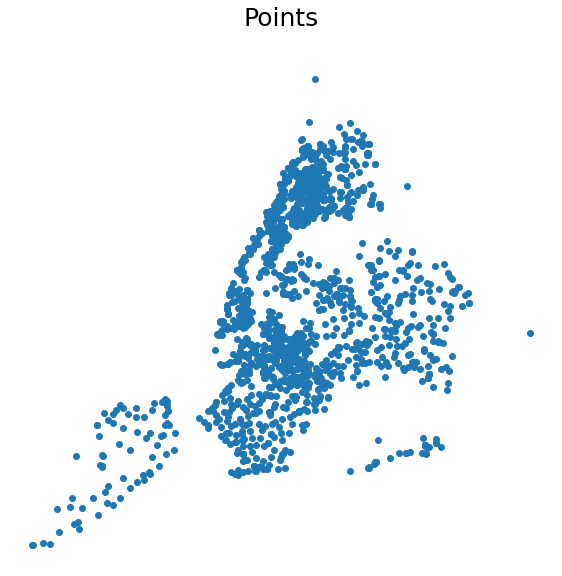

In [35]:
fig, ax = plt.subplots(figsize=(8, 8)) 

# converting to more accurate coordinate referance system
school_points = school_points.to_crs(epsg=2263)
school_points.plot(
    ax=ax, 
    color='#1f77b4'
)

ax.set_title('Points', pad=30, fontsize=25) # setting title as 'Points'
plt.axis('off') # turning off the plot axis
plt.tight_layout() # returing a tight layout of the plot

## 5.2 Lines

In [36]:
url = 'https://data.cityofnewyork.us/api/geospatial/exjm-f27b?method=export&format=GeoJSON'
streets = gpd.read_file(url)

print('shape of data: {}'.format(streets.shape))
streets.head()

shape of data: (121304, 33)


,rw_type,l_low_hn,pre_direct,st_width,r_zip,r_low_hn,bike_lane,post_type,r_blkfc_id,bike_trafd,...,snow_pri,borocode,trafdir,pre_modifi,st_label,physicalid,st_name,created,l_high_hn,geometry
0,1,50,None,42.0,10280,51,None,PL,1222601917,None,...,C,1,TW,None,BATTERY PL,3,BATTERY,2007-11-29T00:00:00,64,"MULTILINESTRING ((-74.01793 40.70617, -74.0178..."
1,1,66,None,42.0,10280,65,None,PL,1222604562,None,...,C,1,TW,None,BATTERY PL,5,BATTERY,2007-11-29T00:00:00,82,"MULTILINESTRING ((-74.01757 40.70684, -74.0171..."
2,1,84,None,42.0,10280,83,None,PL,1222600933,None,...,C,1,TW,None,BATTERY PL,6,BATTERY,2007-11-29T00:00:00,98,"MULTILINESTRING ((-74.01712 40.70746, -74.0166..."
3,1,None,None,42.0,10280,None,None,PL,1222600931,None,...,C,1,TW,None,BATTERY PL,8,BATTERY,2007-11-29T00:00:00,None,"MULTILINESTRING ((-74.01694 40.70481, -74.0170..."
4,1,None,None,24.0,10004,None,None,PL,212262395,None,...,C,1,TF,None,BATTERY PL,14,BATTERY,2011-04-22T00:00:00,None,"MULTILINESTRING ((-74.01429 40.70455, -74.0143..."


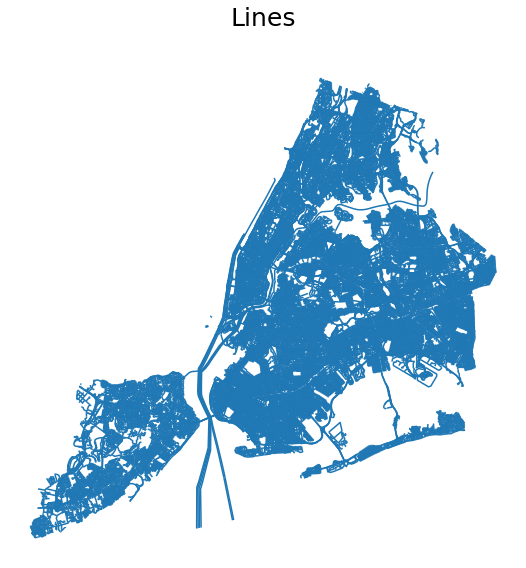

In [37]:
fig, ax = plt.subplots(figsize=(8, 8))

streets = streets.to_crs(epsg=2263) 
streets.plot(
    ax=ax, 
    color='#1f77b4'
)

ax.set_title('Lines', pad=30, fontsize=25)
plt.axis('off')
plt.tight_layout()

## 5.3 Polygons

In [38]:
path = 'https://services5.arcgis.com/GfwWNkhOj9bNBqoJ/arcgis/rest/services/NYC_Neighborhood_Tabulation_Areas_2010\
/FeatureServer/0/query?where=1=1&outFields=*&outSR=4326&f=pgeojson'
nta_shape = gpd.read_file(path)

print('shape of data: {}'.format(nta_shape.shape))
nta_shape.head()

shape of data: (195, 9)


,OBJECTID,BoroCode,BoroName,CountyFIPS,NTACode,NTAName,Shape__Area,Shape__Length,geometry
0,1,4,Queens,081,QN08,St. Albans,7.741276e+07,45401.225082,"POLYGON ((-73.75205 40.70524, -73.75175 40.704..."
1,2,2,Bronx,005,BX28,Van Cortlandt Village,2.566604e+07,21945.694919,"POLYGON ((-73.88705 40.88436, -73.88705 40.884..."
2,3,4,Queens,081,QN55,South Ozone Park,8.246139e+07,36708.169305,"POLYGON ((-73.80577 40.68294, -73.80552 40.682..."
3,4,3,Brooklyn,047,BK40,Windsor Terrace,1.404173e+07,19033.464627,"POLYGON ((-73.98017 40.66116, -73.98021 40.661..."
4,5,3,Brooklyn,047,BK50,Canarsie,8.208973e+07,43703.354933,"MULTIPOLYGON (((-73.88834 40.64672, -73.88835 ..."


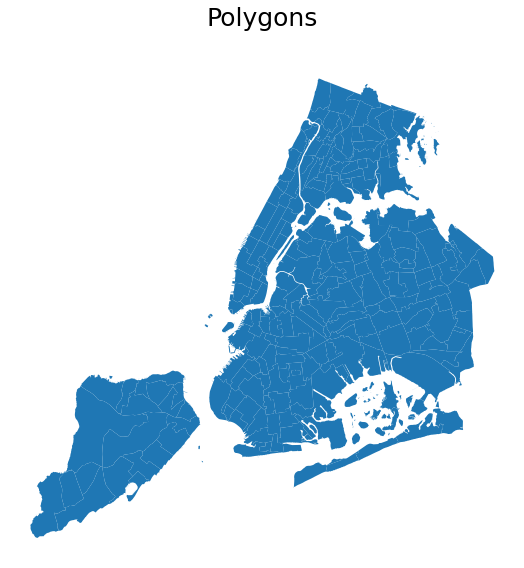

In [39]:
fig, ax = plt.subplots(figsize=(8, 8))

nta_shape = nta_shape.to_crs(epsg=2263)
nta_shape.plot(
    ax=ax, 
    color='#1f77b4'
) 

ax.set_title('Polygons', pad=30, fontsize=25)
plt.axis('off')
plt.tight_layout()

## 5.4 Maps with Layers

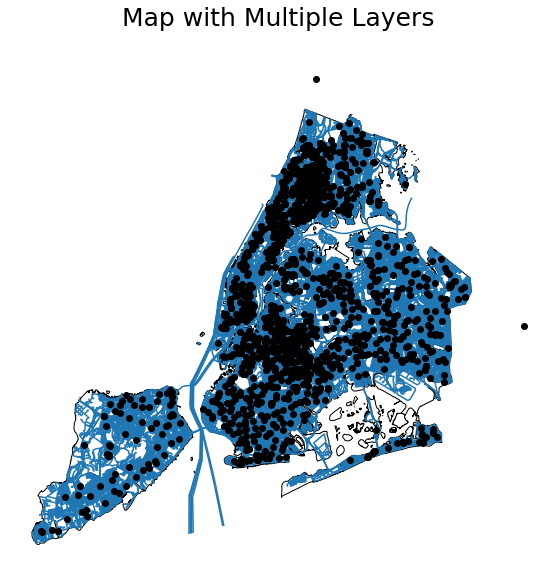

In [40]:
fig, ax = plt.subplots(figsize=(8, 8))

nta_shape.plot(
    ax=ax, 
    color='white', 
    edgecolor='black', 
    zorder=0
)

streets.plot(
    ax=ax, 
    zorder=1
)

school_points.plot(
    ax=ax, 
    color='black', 
    zorder=1
)

ax.set_title('Map with Multiple Layers', pad=30, fontsize=25)
plt.axis('off')
plt.tight_layout()

## 5.5 Adding Background Map

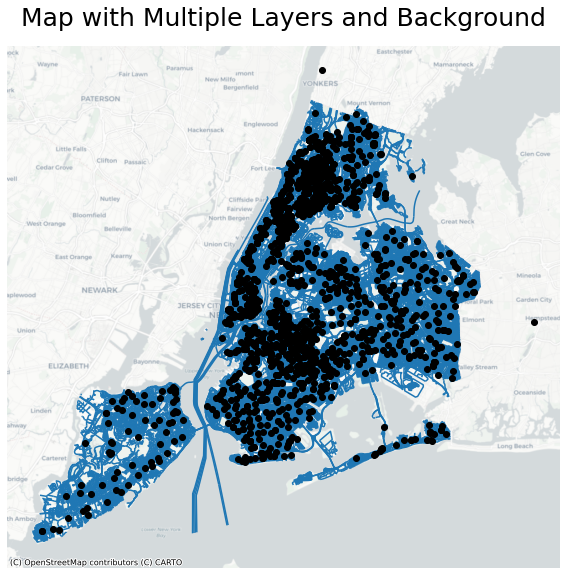

In [41]:
fig, ax = plt.subplots(figsize=(8, 8))

source = ctx.providers.CartoDB.Positron

nta_shape.plot(
    ax=ax, 
    color='white', 
    edgecolor='black', 
    zorder=0
)

streets.plot(
    ax=ax, 
    zorder=1
)

school_points.plot(
    ax=ax, 
    color='black', 
    zorder=2
)

# adding basemap
ctx.add_basemap(
    ax, 
    crs=2263, 
    source=source
)

ax.set_title(
    'Map with Multiple Layers and Background',
    pad=20, fontsize=25
)
plt.axis('off')
plt.tight_layout()

## 5.6 Clip Data

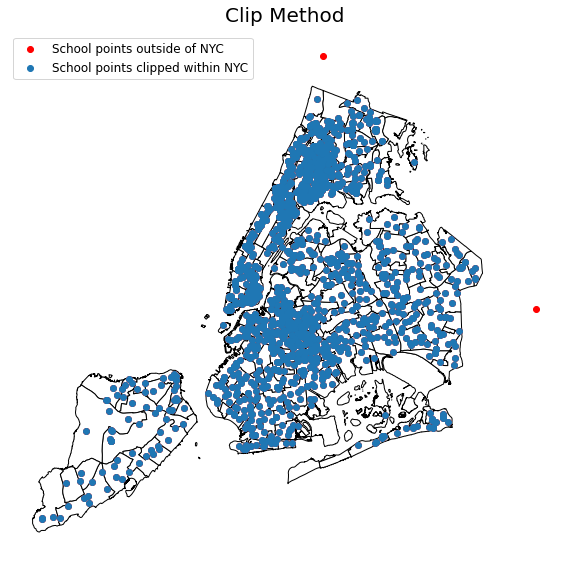

In [42]:
# clipping the school points that only fall within the nta shapes
school_points_clipped = gpd.clip(
    school_points,
    nta_shape
)

fig, ax = plt.subplots(figsize=(8, 8))

nta_shape.plot(
    ax=ax, 
    color="white", 
    edgecolor='black', 
    zorder=0
)    

# plotting all points
school_points.plot(
    ax=ax, 
    color='red', 
    zorder=1,
    label='School points outside of NYC'
)

# plotting only the clipped points
school_points_clipped.plot(
    ax=ax, 
    color='#1f77b4', 
    zorder=2, 
    label='School points clipped within NYC'
)

ax.set_title('Clip Method', pad=10, fontsize=20)
plt.legend(loc='upper left', fontsize=12)
plt.axis('off')
plt.tight_layout()

# 6. Joining Data

## 6.1 Attribute Join

In [43]:
path = 'https://services5.arcgis.com/GfwWNkhOj9bNBqoJ/arcgis/rest/services/NYC_Neighborhood_Tabulation_Areas_2010\
/FeatureServer/0/query?where=1=1&outFields=*&outSR=4326&f=pgeojson'
nta_shape = gpd.read_file(path)

print('shape of data: {}'.format(nta_shape.shape))
nta_shape.head()

shape of data: (195, 9)


,OBJECTID,BoroCode,BoroName,CountyFIPS,NTACode,NTAName,Shape__Area,Shape__Length,geometry
0,1,4,Queens,081,QN08,St. Albans,7.741276e+07,45401.225082,"POLYGON ((-73.75205 40.70524, -73.75175 40.704..."
1,2,2,Bronx,005,BX28,Van Cortlandt Village,2.566604e+07,21945.694919,"POLYGON ((-73.88705 40.88436, -73.88705 40.884..."
2,3,4,Queens,081,QN55,South Ozone Park,8.246139e+07,36708.169305,"POLYGON ((-73.80577 40.68294, -73.80552 40.682..."
3,4,3,Brooklyn,047,BK40,Windsor Terrace,1.404173e+07,19033.464627,"POLYGON ((-73.98017 40.66116, -73.98021 40.661..."
4,5,3,Brooklyn,047,BK50,Canarsie,8.208973e+07,43703.354933,"MULTIPOLYGON (((-73.88834 40.64672, -73.88835 ..."


In [44]:
# reading in population by nta data
url = 'https://data.cityofnewyork.us/api/views/swpk-hqdp/rows.csv?accessType=DOWNLOAD'
nyc_pop = pd.read_csv(url)

print('shape of data: {}'.format(nyc_pop.shape))
nyc_pop.head()

shape of data: (390, 6)


,Borough,Year,FIPS County Code,NTA Code,NTA Name,Population
0,Bronx,2000,5,BX01,Claremont-Bathgate,28149
1,Bronx,2000,5,BX03,Eastchester-Edenwald-Baychester,35422
2,Bronx,2000,5,BX05,Bedford Park-Fordham North,55329
3,Bronx,2000,5,BX06,Belmont,25967
4,Bronx,2000,5,BX07,Bronxdale,34309


In [45]:
print('years: {}'.format(nyc_pop['Year'].unique()))

# only saving data from year 2010; dropping year 2000 records
nyc_pop = nyc_pop.loc[nyc_pop['Year'] == 2010]

print('select one year: {}'.format(nyc_pop['Year'].unique()))

years: [2000 2010]
select one year: [2010]


In [46]:
# merging our nta shape data with the population data
nta_with_pop = nta_shape.merge(
    nyc_pop, 
    left_on='NTACode', 
    right_on='NTA Code'
)

nta_with_pop.head()

,OBJECTID,BoroCode,BoroName,CountyFIPS,NTACode,NTAName,Shape__Area,Shape__Length,geometry,Borough,Year,FIPS County Code,NTA Code,NTA Name,Population
0,1,4,Queens,081,QN08,St. Albans,7.741276e+07,45401.225082,"POLYGON ((-73.75205 40.70524, -73.75175 40.704...",Queens,2010,81,QN08,St. Albans,48593
1,2,2,Bronx,005,BX28,Van Cortlandt Village,2.566604e+07,21945.694919,"POLYGON ((-73.88705 40.88436, -73.88705 40.884...",Bronx,2010,5,BX28,Van Cortlandt Village,50100
2,3,4,Queens,081,QN55,South Ozone Park,8.246139e+07,36708.169305,"POLYGON ((-73.80577 40.68294, -73.80552 40.682...",Queens,2010,81,QN55,South Ozone Park,75878
3,4,3,Brooklyn,047,BK40,Windsor Terrace,1.404173e+07,19033.464627,"POLYGON ((-73.98017 40.66116, -73.98021 40.661...",Brooklyn,2010,47,BK40,Windsor Terrace,20988
4,5,3,Brooklyn,047,BK50,Canarsie,8.208973e+07,43703.354933,"MULTIPOLYGON (((-73.88834 40.64672, -73.88835 ...",Brooklyn,2010,47,BK50,Canarsie,83693


## 6.2 Spatial Join

In [47]:
path = 'https://services5.arcgis.com/GfwWNkhOj9bNBqoJ/arcgis/rest/services/NYC_Neighborhood_Tabulation_Areas_2010\
/FeatureServer/0/query?where=1=1&outFields=*&outSR=4326&f=pgeojson'
nta_shape = gpd.read_file(path)

print('shape of data: {}'.format(nta_shape.shape))
nta_shape.head()

shape of data: (195, 9)


,OBJECTID,BoroCode,BoroName,CountyFIPS,NTACode,NTAName,Shape__Area,Shape__Length,geometry
0,1,4,Queens,081,QN08,St. Albans,7.741276e+07,45401.225082,"POLYGON ((-73.75205 40.70524, -73.75175 40.704..."
1,2,2,Bronx,005,BX28,Van Cortlandt Village,2.566604e+07,21945.694919,"POLYGON ((-73.88705 40.88436, -73.88705 40.884..."
2,3,4,Queens,081,QN55,South Ozone Park,8.246139e+07,36708.169305,"POLYGON ((-73.80577 40.68294, -73.80552 40.682..."
3,4,3,Brooklyn,047,BK40,Windsor Terrace,1.404173e+07,19033.464627,"POLYGON ((-73.98017 40.66116, -73.98021 40.661..."
4,5,3,Brooklyn,047,BK50,Canarsie,8.208973e+07,43703.354933,"MULTIPOLYGON (((-73.88834 40.64672, -73.88835 ..."


In [48]:
path = 'https://data.cityofnewyork.us/download/jfju-ynrr/application%2Fzip'
school_points = gpd.read_file(path)

print('shape of data: {}'.format(school_points.shape))
school_points.head()

shape of data: (1709, 18)


,ATS_CODE,BORO,BORONUM,LOC_CODE,SCHOOLNAME,SCH_TYPE,MANAGED_BY,GEO_DISTRI,ADMIN_DIST,ADDRESS,STATE_CODE,ZIP,PRINCIPAL,PRIN_PH,FAX,GRADES,City,geometry
0,15K001,K,2.0,K001,P.S. 001 THE BERGEN,Elementary,1,15,15,309 47 STREET,NY,11220,Jennifer Eusanio,718-567-7661,718-567-9771,"PK,0K,01,02,03,04,05,SE",BROOKLYN,POINT (980985.054 175780.759)
1,17K002,K,2.0,K002,M.S. 002,Junior High-Intermediate-Middle,1,17,17,655 PARKSIDE AVENUE,NY,11226,ADRIENNE SPENCER,718-462-6992,718-284-7717,"06,07,08,SE",BROOKLYN,POINT (997785.136 178431.911)
2,21K095,K,2.0,K095,P.S. 095 THE GRAVESEND,K-8,1,21,21,345 VAN SICKLEN STREET,NY,11223,Janet Ndzibah,718-449-5050,718-449-3047,"PK,0K,01,02,03,04,05,06,07,08,SE",BROOKLYN,POINT (991224.983 156323.361)
3,21K096,K,2.0,K096,I.S. 096 SETH LOW,Junior High-Intermediate-Middle,1,21,21,99 AVENUE P,NY,11204,Denise Sandra Levinsky,718-236-1344,718-236-2397,"06,07,08,SE",BROOKLYN,POINT (988439.681 160709.993)
4,21K097,K,2.0,K097,P.S. 97 THE HIGHLAWN,Elementary,1,21,21,1855 STILLWELL AVENUE,NY,11223,KRISTINE MUSTILLO,718-372-7393,718-372-3842,"PK,0K,01,02,03,04,05,SE",BROOKLYN,POINT (988205.073 158329.591)


In [49]:
# identifying the CRS
nta_shape.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World.
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

In [50]:
# identifying the CRS
school_points.crs

<Derived Projected CRS: EPSG:2263>
Name: NAD83 / New York Long Island (ftUS)
Axis Info [cartesian]:
- X[east]: Easting (US survey foot)
- Y[north]: Northing (US survey foot)
Area of Use:
- name: United States (USA) - New York - counties of Bronx; Kings; Nassau; New York; Queens; Richmond; Suffolk.
- bounds: (-74.26, 40.47, -71.8, 41.3)
Coordinate Operation:
- name: SPCS83 New York Long Island zone (US Survey feet)
- method: Lambert Conic Conformal (2SP)
Datum: North American Datum 1983
- Ellipsoid: GRS 1980
- Prime Meridian: Greenwich

In [51]:
# changing CRS so they both match
nta_shape = nta_shape.to_crs(school_points.crs)
nta_shape.crs

<Derived Projected CRS: EPSG:2263>
Name: NAD83 / New York Long Island (ftUS)
Axis Info [cartesian]:
- X[east]: Easting (US survey foot)
- Y[north]: Northing (US survey foot)
Area of Use:
- name: United States (USA) - New York - counties of Bronx; Kings; Nassau; New York; Queens; Richmond; Suffolk.
- bounds: (-74.26, 40.47, -71.8, 41.3)
Coordinate Operation:
- name: SPCS83 New York Long Island zone (US Survey feet)
- method: Lambert Conic Conformal (2SP)
Datum: North American Datum 1983
- Ellipsoid: GRS 1980
- Prime Meridian: Greenwich

In [52]:
# spatial join nta data to the school points data with operation = 'intersects'
school_points_with_nta = gpd.sjoin(
    school_points,
    nta_shape, 
    how="inner", 
    op='intersects'
)

school_points_with_nta.head()

,ATS_CODE,BORO,BORONUM,LOC_CODE,SCHOOLNAME,SCH_TYPE,MANAGED_BY,GEO_DISTRI,ADMIN_DIST,ADDRESS,...,geometry,index_right,OBJECTID,BoroCode,BoroName,CountyFIPS,NTACode,NTAName,Shape__Area,Shape__Length
0,15K001,K,2.0,K001,P.S. 001 THE BERGEN,Elementary,1,15,15,309 47 STREET,...,POINT (980985.054 175780.759),171,172,3,Brooklyn,047,BK32,Sunset Park West,4.995550e+07,83039.112519
36,15K136,K,2.0,K136,I.S. 136 CHARLES O. DEWEY,Junior High-Intermediate-Middle,1,15,15,4004 4 AVENUE,...,POINT (982218.628 176813.496),171,172,3,Brooklyn,047,BK32,Sunset Park West,4.995550e+07,83039.112519
65,15K172,K,2.0,K172,P.S. 172 BEACON SCHOOL OF EXCELLENCE,Elementary,1,15,15,825 4 AVENUE,...,POINT (984158.590 178921.890),171,172,3,Brooklyn,047,BK32,Sunset Park West,4.995550e+07,83039.112519
168,15K295,K,2.0,K295,P.S. 295,Elementary,1,15,15,330 18 STREET,...,POINT (987330.493 180120.659),171,172,3,Brooklyn,047,BK32,Sunset Park West,4.995550e+07,83039.112519
222,75K371,K,2.0,K371,P.S. 371 - LILLIAN L. RASHKIS,High school,1,15,75,355 37 STREET,...,POINT (982776.837 177607.547),171,172,3,Brooklyn,047,BK32,Sunset Park West,4.995550e+07,83039.112519


In [53]:
# number of schools per NTA top 20
(school_points_with_nta
 .groupby(by='NTAName')['ATS_CODE']
 .count()
 .sort_values(ascending=False)
 .head(20)
)

NTAName
Brownsville                                         30
Stuyvesant Heights                                  28
East Harlem South                                   28
East Concourse-Concourse Village                    27
Mott Haven-Port Morris                              27
Claremont-Bathgate                                  26
Central Harlem North-Polo Grounds                   25
Upper West Side                                     25
East New York                                       24
Lower East Side                                     24
Soundview-Castle Hill-Clason Point-Harding Park     23
DUMBO-Vinegar Hill-Downtown Brooklyn-Boerum Hill    23
East Harlem North                                   22
Canarsie                                            22
Bedford                                             22
Crown Heights North                                 21
Bushwick South                                      20
Chinatown                                           19
Wa

# 7. Indexing and Selecting Data

In [54]:
path = 'https://services5.arcgis.com/GfwWNkhOj9bNBqoJ/arcgis/rest/services/NYC_Neighborhood_Tabulation_Areas_2010\
/FeatureServer/0/query?where=1=1&outFields=*&outSR=4326&f=pgeojson'
nta_shape = gpd.read_file(path)

print('shape of data: {}'.format(nta_shape.shape))
nta_shape.head()

shape of data: (195, 9)


,OBJECTID,BoroCode,BoroName,CountyFIPS,NTACode,NTAName,Shape__Area,Shape__Length,geometry
0,1,4,Queens,081,QN08,St. Albans,7.741276e+07,45401.225082,"POLYGON ((-73.75205 40.70524, -73.75175 40.704..."
1,2,2,Bronx,005,BX28,Van Cortlandt Village,2.566604e+07,21945.694919,"POLYGON ((-73.88705 40.88436, -73.88705 40.884..."
2,3,4,Queens,081,QN55,South Ozone Park,8.246139e+07,36708.169305,"POLYGON ((-73.80577 40.68294, -73.80552 40.682..."
3,4,3,Brooklyn,047,BK40,Windsor Terrace,1.404173e+07,19033.464627,"POLYGON ((-73.98017 40.66116, -73.98021 40.661..."
4,5,3,Brooklyn,047,BK50,Canarsie,8.208973e+07,43703.354933,"MULTIPOLYGON (((-73.88834 40.64672, -73.88835 ..."


<AxesSubplot:>

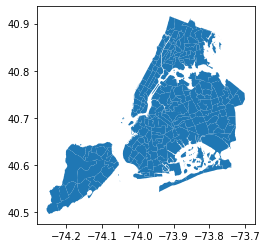

In [55]:
nta_shape.plot()

<AxesSubplot:>

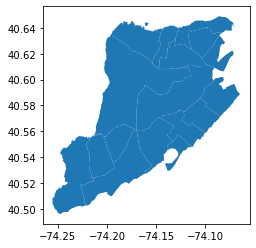

In [56]:
# slicing the nta data with everything up to lon = -74.1
(nta_shape
 .cx[:-74.1, :]
 .plot()
)

<AxesSubplot:>

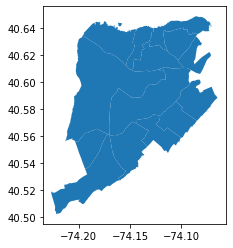

In [57]:
# slicing the nta data with everything up to lon = -74.1 and everything after lat = 40.56
(nta_shape
 .cx[:-74.1, 40.56:]
 .plot()
)

# 8. Coordinate Reference Systems

In [58]:
path = 'https://services5.arcgis.com/GfwWNkhOj9bNBqoJ/arcgis/rest/services/NYC_Neighborhood_Tabulation_Areas_2010\
/FeatureServer/0/query?where=1=1&outFields=*&outSR=4326&f=pgeojson'
nta_shape = gpd.read_file(path)

print('shape of data: {}'.format(nta_shape.shape))
nta_shape.head()

shape of data: (195, 9)


,OBJECTID,BoroCode,BoroName,CountyFIPS,NTACode,NTAName,Shape__Area,Shape__Length,geometry
0,1,4,Queens,081,QN08,St. Albans,7.741276e+07,45401.225082,"POLYGON ((-73.75205 40.70524, -73.75175 40.704..."
1,2,2,Bronx,005,BX28,Van Cortlandt Village,2.566604e+07,21945.694919,"POLYGON ((-73.88705 40.88436, -73.88705 40.884..."
2,3,4,Queens,081,QN55,South Ozone Park,8.246139e+07,36708.169305,"POLYGON ((-73.80577 40.68294, -73.80552 40.682..."
3,4,3,Brooklyn,047,BK40,Windsor Terrace,1.404173e+07,19033.464627,"POLYGON ((-73.98017 40.66116, -73.98021 40.661..."
4,5,3,Brooklyn,047,BK50,Canarsie,8.208973e+07,43703.354933,"MULTIPOLYGON (((-73.88834 40.64672, -73.88835 ..."


In [59]:
# checking the current CRS
nta_shape.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World.
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

<AxesSubplot:>

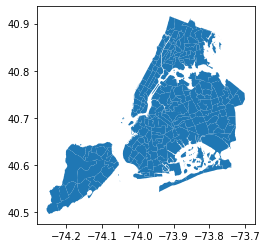

In [60]:
nta_shape.plot()

<AxesSubplot:>

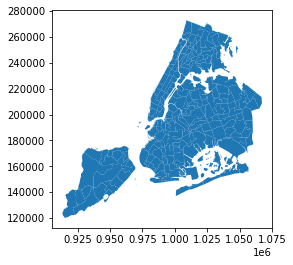

In [61]:
# switching CRS of nta to epsg = 2263
(nta_shape
 .to_crs(epsg=2263)
 .plot()
)

# 9. Types of Maps

In [62]:
url = 'https://data.cityofnewyork.us/api/views/swpk-hqdp/rows.csv?accessType=DOWNLOAD'
nyc_pop = pd.read_csv(url)

print(nyc_pop.shape)
nyc_pop.head()

(390, 6)


,Borough,Year,FIPS County Code,NTA Code,NTA Name,Population
0,Bronx,2000,5,BX01,Claremont-Bathgate,28149
1,Bronx,2000,5,BX03,Eastchester-Edenwald-Baychester,35422
2,Bronx,2000,5,BX05,Bedford Park-Fordham North,55329
3,Bronx,2000,5,BX06,Belmont,25967
4,Bronx,2000,5,BX07,Bronxdale,34309


In [63]:
# saving only the population numbers for the year 2010
nyc_pop = nyc_pop.loc[nyc_pop['Year'] == 2010]

nyc_pop.head()

,Borough,Year,FIPS County Code,NTA Code,NTA Name,Population
195,Bronx,2010,5,BX01,Claremont-Bathgate,31078
196,Bronx,2010,5,BX03,Eastchester-Edenwald-Baychester,34517
197,Bronx,2010,5,BX05,Bedford Park-Fordham North,54415
198,Bronx,2010,5,BX06,Belmont,27378
199,Bronx,2010,5,BX07,Bronxdale,35538


In [64]:
path = 'https://services5.arcgis.com/GfwWNkhOj9bNBqoJ/arcgis/rest/services/NYC_Neighborhood_Tabulation_Areas_2010\
/FeatureServer/0/query?where=1=1&outFields=*&outSR=4326&f=pgeojson'
nta_shape = gpd.read_file(path)

print('shape of data: {}'.format(nta_shape.shape))
nta_shape.head()

shape of data: (195, 9)


,OBJECTID,BoroCode,BoroName,CountyFIPS,NTACode,NTAName,Shape__Area,Shape__Length,geometry
0,1,4,Queens,081,QN08,St. Albans,7.741276e+07,45401.225082,"POLYGON ((-73.75205 40.70524, -73.75175 40.704..."
1,2,2,Bronx,005,BX28,Van Cortlandt Village,2.566604e+07,21945.694919,"POLYGON ((-73.88705 40.88436, -73.88705 40.884..."
2,3,4,Queens,081,QN55,South Ozone Park,8.246139e+07,36708.169305,"POLYGON ((-73.80577 40.68294, -73.80552 40.682..."
3,4,3,Brooklyn,047,BK40,Windsor Terrace,1.404173e+07,19033.464627,"POLYGON ((-73.98017 40.66116, -73.98021 40.661..."
4,5,3,Brooklyn,047,BK50,Canarsie,8.208973e+07,43703.354933,"MULTIPOLYGON (((-73.88834 40.64672, -73.88835 ..."


In [65]:
# joining our nta population data to our nta shapes data
nta_pop = nta_shape.merge(
    nyc_pop,
    left_on='NTACode', 
    right_on='NTA Code', 
    how='inner'
)

nta_pop.head()

,OBJECTID,BoroCode,BoroName,CountyFIPS,NTACode,NTAName,Shape__Area,Shape__Length,geometry,Borough,Year,FIPS County Code,NTA Code,NTA Name,Population
0,1,4,Queens,081,QN08,St. Albans,7.741276e+07,45401.225082,"POLYGON ((-73.75205 40.70524, -73.75175 40.704...",Queens,2010,81,QN08,St. Albans,48593
1,2,2,Bronx,005,BX28,Van Cortlandt Village,2.566604e+07,21945.694919,"POLYGON ((-73.88705 40.88436, -73.88705 40.884...",Bronx,2010,5,BX28,Van Cortlandt Village,50100
2,3,4,Queens,081,QN55,South Ozone Park,8.246139e+07,36708.169305,"POLYGON ((-73.80577 40.68294, -73.80552 40.682...",Queens,2010,81,QN55,South Ozone Park,75878
3,4,3,Brooklyn,047,BK40,Windsor Terrace,1.404173e+07,19033.464627,"POLYGON ((-73.98017 40.66116, -73.98021 40.661...",Brooklyn,2010,47,BK40,Windsor Terrace,20988
4,5,3,Brooklyn,047,BK50,Canarsie,8.208973e+07,43703.354933,"MULTIPOLYGON (((-73.88834 40.64672, -73.88835 ...",Brooklyn,2010,47,BK50,Canarsie,83693


In [66]:
nta_pop.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World.
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

In [67]:
nta_pop = nta_pop.to_crs(epsg=2263)

nta_pop.crs

<Derived Projected CRS: EPSG:2263>
Name: NAD83 / New York Long Island (ftUS)
Axis Info [cartesian]:
- X[east]: Easting (US survey foot)
- Y[north]: Northing (US survey foot)
Area of Use:
- name: United States (USA) - New York - counties of Bronx; Kings; Nassau; New York; Queens; Richmond; Suffolk.
- bounds: (-74.26, 40.47, -71.8, 41.3)
Coordinate Operation:
- name: SPCS83 New York Long Island zone (US Survey feet)
- method: Lambert Conic Conformal (2SP)
Datum: North American Datum 1983
- Ellipsoid: GRS 1980
- Prime Meridian: Greenwich

In [68]:
# returning the area of our nta as a new column 'sq_ft'
nta_pop['sq_ft'] = nta_pop.area

nta_pop.head()

,OBJECTID,BoroCode,BoroName,CountyFIPS,NTACode,NTAName,Shape__Area,Shape__Length,geometry,Borough,Year,FIPS County Code,NTA Code,NTA Name,Population,sq_ft
0,1,4,Queens,081,QN08,St. Albans,7.741276e+07,45401.225082,"POLYGON ((1052995.809 196310.668, 1053081.292 ...",Queens,2010,81,QN08,St. Albans,48593,7.741295e+07
1,2,2,Bronx,005,BX28,Van Cortlandt Village,2.566604e+07,21945.694919,"POLYGON ((1015481.441 261493.600, 1015482.349 ...",Bronx,2010,5,BX28,Van Cortlandt Village,50100,2.566605e+07
2,3,4,Queens,081,QN55,South Ozone Park,8.246139e+07,36708.169305,"POLYGON ((1038120.113 188150.104, 1038189.955 ...",Queens,2010,81,QN55,South Ozone Park,75878,8.246163e+07
3,4,3,Brooklyn,047,BK40,Windsor Terrace,1.404173e+07,19033.464627,"POLYGON ((989750.827 180156.637, 989741.211 18...",Brooklyn,2010,47,BK40,Windsor Terrace,20988,1.404178e+07
4,5,3,Brooklyn,047,BK50,Canarsie,8.208973e+07,43703.354933,"MULTIPOLYGON (((1015235.757 174913.308, 101523...",Brooklyn,2010,47,BK50,Canarsie,83693,8.208999e+07


In [69]:
# converting square feet to square miles and saving as a new column
nta_pop['sq_mi'] = nta_pop['sq_ft'] / 27878400

nta_pop.head()   

,OBJECTID,BoroCode,BoroName,CountyFIPS,NTACode,NTAName,Shape__Area,Shape__Length,geometry,Borough,Year,FIPS County Code,NTA Code,NTA Name,Population,sq_ft,sq_mi
0,1,4,Queens,081,QN08,St. Albans,7.741276e+07,45401.225082,"POLYGON ((1052995.809 196310.668, 1053081.292 ...",Queens,2010,81,QN08,St. Albans,48593,7.741295e+07,2.776808
1,2,2,Bronx,005,BX28,Van Cortlandt Village,2.566604e+07,21945.694919,"POLYGON ((1015481.441 261493.600, 1015482.349 ...",Bronx,2010,5,BX28,Van Cortlandt Village,50100,2.566605e+07,0.920643
2,3,4,Queens,081,QN55,South Ozone Park,8.246139e+07,36708.169305,"POLYGON ((1038120.113 188150.104, 1038189.955 ...",Queens,2010,81,QN55,South Ozone Park,75878,8.246163e+07,2.957904
3,4,3,Brooklyn,047,BK40,Windsor Terrace,1.404173e+07,19033.464627,"POLYGON ((989750.827 180156.637, 989741.211 18...",Brooklyn,2010,47,BK40,Windsor Terrace,20988,1.404178e+07,0.503680
4,5,3,Brooklyn,047,BK50,Canarsie,8.208973e+07,43703.354933,"MULTIPOLYGON (((1015235.757 174913.308, 101523...",Brooklyn,2010,47,BK50,Canarsie,83693,8.208999e+07,2.944573


In [70]:
# creating a new column of the population density (pop/area) of each nta
nta_pop['density (pop/sq_mi)'] = nta_pop['Population'] / nta_pop['sq_mi']

(nta_pop
 .sort_values(by='density (pop/sq_mi)', ascending=False)
 .iloc[:5,-6:]
)

,NTA Code,NTA Name,Population,sq_ft,sq_mi,density (pop/sq_mi)
119,MN32,Yorkville,77942,1.364823e+07,0.489563,159207.345183
109,BX40,Fordham South,28262,6.308877e+06,0.226300,124887.413110
100,MN22,East Village,44136,1.089429e+07,0.390779,112943.665456
134,MN14,Lincoln Square,61489,1.580586e+07,0.566957,108454.409943
133,MN12,Upper West Side,132378,3.437995e+07,1.233211,107344.149272


## 9.1 Choropleth Maps

<AxesSubplot:>

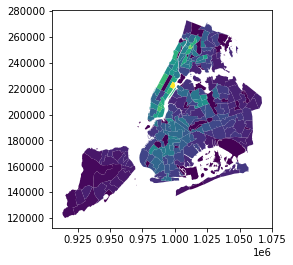

In [71]:
# plotting a choropleth map on the column 'density (pop/sq_mi)'
nta_pop.plot(column='density (pop/sq_mi)')

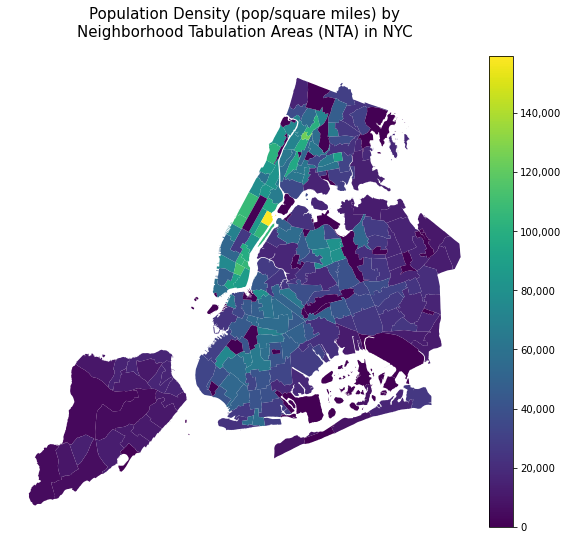

In [72]:
fig, ax = plt.subplots(figsize=(8,8))

# saving variable to format integers as strings with commas
comma_fmt = FuncFormatter(lambda x, p: format(int(x), ','))

# resizing the color bar to scale to the plot
divider = make_axes_locatable(ax)
cax = divider.append_axes("right", size="5%", pad=0.1)

# plotting 'density (pop/sq_mi)' as a choropleth map
nta_pop.plot(
    column='density (pop/sq_mi)', 
    ax=ax, # plotting on the generated axis
    cax=cax, # legend of the color bar
    legend=True, # turning on legend
    legend_kwds={'format':comma_fmt}
)

# setting title
ax.set_title(
    'Population Density (pop/square miles) by\nNeighborhood Tabulation Areas (NTA) in NYC', 
    fontsize=15,
    pad=20
)

ax.axis('off')
plt.tight_layout()

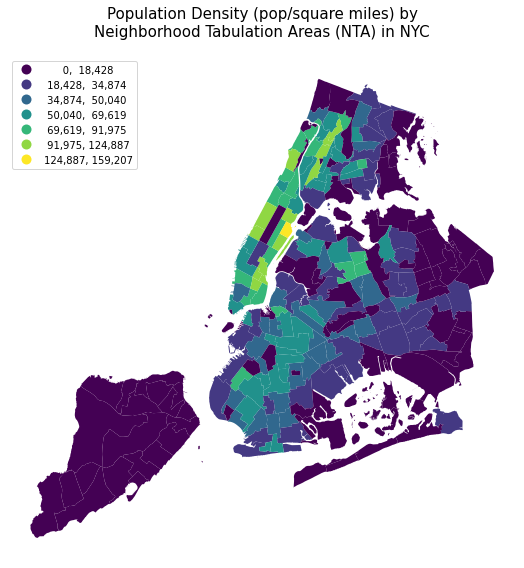

In [73]:
fig, ax = plt.subplots(figsize=(8, 8))

nta_pop.plot(
    column='density (pop/sq_mi)', 
    ax=ax, 
    legend=True, 
    scheme='fisher_jenks',
    k=7,
    legend_kwds={'loc': "upper left", 
                 'fmt': "{:,.0f}",
                 'fontsize': "10"}
)     
        
ax.set_title(
    'Population Density (pop/square miles) by\nNeighborhood Tabulation Areas (NTA) in NYC', 
    fontsize=15, 
    pad=20
)

plt.axis('off')
plt.tight_layout()

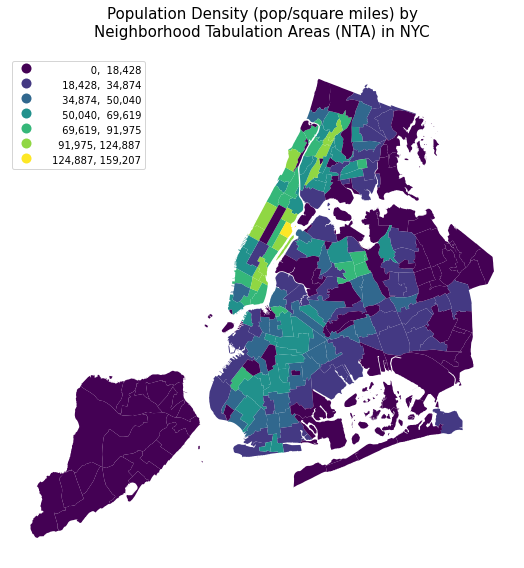

In [74]:
# align legend numbers

fig, ax = plt.subplots(figsize=(8, 8))

nta_pop.plot(
    column='density (pop/sq_mi)', 
    ax=ax, 
    legend=True, 
    scheme='fisher_jenks',
    k=7,
    legend_kwds={'loc': "upper left", 
                 'fmt': "{:,.0f}",
                 'fontsize': "10"}
)

# returning the legend
leg = ax.get_legend()

# making the legend labels right horizontal aligned
hp = leg._legend_box.get_children()[1]
for vp in hp.get_children():
    for row in vp.get_children():
        row.set_width(125)  # need to adapt this manually
        row.mode= "expand"
        row.align="right"     
        
ax.set_title(
    'Population Density (pop/square miles) by\nNeighborhood Tabulation Areas (NTA) in NYC', 
    fontsize=15, pad=20
)

plt.axis('off')
plt.tight_layout()

## 9.2 Hexbin Map

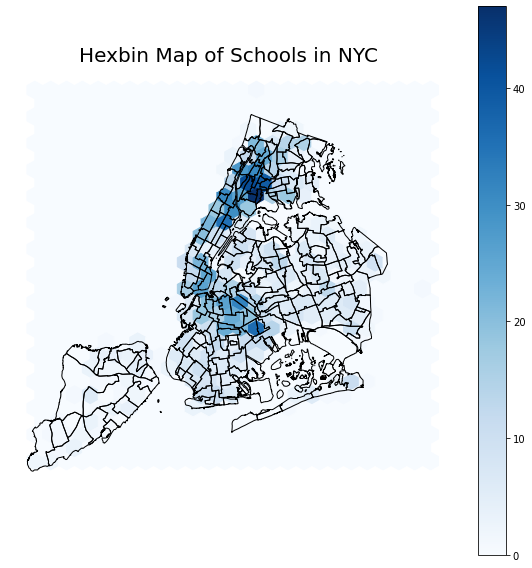

In [75]:
fig, ax = plt.subplots(figsize=(8, 8))

school_points['x'] = school_points['geometry'].x
school_points['y'] = school_points['geometry'].y
df = pd.DataFrame(school_points)

df.plot.hexbin(
    x='x', 
    y='y', 
    gridsize=25, 
    ax=ax,
    cmap='Blues'
)


(nta_shape
 .to_crs(epsg=2263)
 .plot(
     ax=ax, 
     color='None', 
     edgecolor='black')
 )

ax.set_title('Hexbin Map of Schools in NYC', fontsize=20, pad=10)
plt.axis('off')
fig.tight_layout()

## 9.3 Proportional Symbol Map

In [76]:
nta_pop['centroid'] = nta_pop.centroid
nta_pop = nta_pop.set_geometry('centroid')

nta_pop.head()

,OBJECTID,BoroCode,BoroName,CountyFIPS,NTACode,NTAName,Shape__Area,Shape__Length,geometry,Borough,Year,FIPS County Code,NTA Code,NTA Name,Population,sq_ft,sq_mi,density (pop/sq_mi),centroid
0,1,4,Queens,081,QN08,St. Albans,7.741276e+07,45401.225082,"POLYGON ((1052995.809 196310.668, 1053081.292 ...",Queens,2010,81,QN08,St. Albans,48593,7.741295e+07,2.776808,17499.592361,POINT (1049933.341 191191.777)
1,2,2,Bronx,005,BX28,Van Cortlandt Village,2.566604e+07,21945.694919,"POLYGON ((1015481.441 261493.600, 1015482.349 ...",Bronx,2010,5,BX28,Van Cortlandt Village,50100,2.566605e+07,0.920643,54418.494289,POINT (1013114.881 258635.540)
2,3,4,Queens,081,QN55,South Ozone Park,8.246139e+07,36708.169305,"POLYGON ((1038120.113 188150.104, 1038189.955 ...",Queens,2010,81,QN55,South Ozone Park,75878,8.246163e+07,2.957904,25652.624333,POINT (1034328.081 185672.744)
3,4,3,Brooklyn,047,BK40,Windsor Terrace,1.404173e+07,19033.464627,"POLYGON ((989750.827 180156.637, 989741.211 18...",Brooklyn,2010,47,BK40,Windsor Terrace,20988,1.404178e+07,0.503680,41669.346872,POINT (990358.891 177408.685)
4,5,3,Brooklyn,047,BK50,Canarsie,8.208973e+07,43703.354933,"MULTIPOLYGON (((1015235.757 174913.308, 101523...",Brooklyn,2010,47,BK50,Canarsie,83693,8.208999e+07,2.944573,28422.795953,POINT (1012072.697 171751.428)


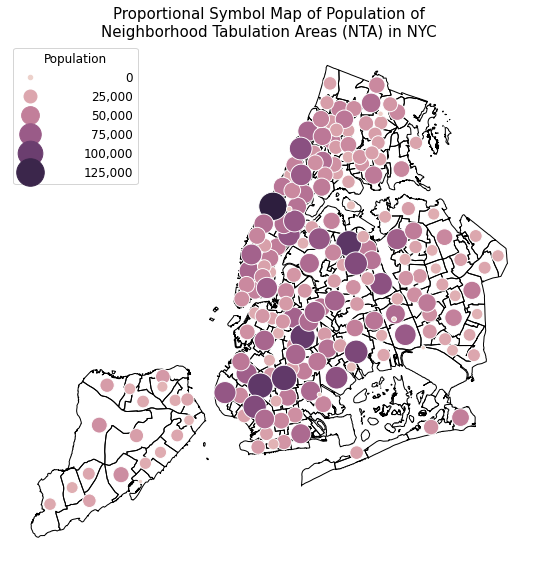

In [77]:
fig, ax = plt.subplots(figsize=(8,8))

ax = sns.scatterplot(
    x=nta_pop['centroid'].x,
    y=nta_pop['centroid'].y, 
    data=nta_pop, 
    size="Population",
    hue='Population',
    sizes=(20, 800)
)

(nta_shape
 .to_crs(epsg=2263)
 .plot(
     ax=ax, 
     color='None', 
     edgecolor='black',
     zorder=0)
)

current_handles, current_labels = plt.gca().get_legend_handles_labels()
       
for i in range(len(current_labels)):
    current_labels[i] = int(current_labels[i])
    current_labels[i] = "{:,}".format((current_labels[i])) 
    
leg = ax.legend(
    current_handles, current_labels, 
    loc='upper left', 
    fontsize='large', 
    title='Population',  
    title_fontsize=12
)

hp = leg._legend_box.get_children()[1]
for vp in hp.get_children():
    for row in vp.get_children():
        row.set_width(115)
        row.mode= "expand"
        row.align="right"

ax.set_title(
    'Proportional Symbol Map of Population of\nNeighborhood Tabulation Areas (NTA) in NYC', 
    fontsize=15
)
plt.axis('off')
plt.tight_layout()

# 10. Relationship Tests

In [78]:
path = 'https://services5.arcgis.com/GfwWNkhOj9bNBqoJ/arcgis/rest/services/NYC_Neighborhood_Tabulation_Areas_2010\
/FeatureServer/0/query?where=1=1&outFields=*&outSR=4326&f=pgeojson'
nta_shape = gpd.read_file(path)

print('shape of data: {}'.format(nta_shape.shape))
nta_shape.head()

shape of data: (195, 9)


,OBJECTID,BoroCode,BoroName,CountyFIPS,NTACode,NTAName,Shape__Area,Shape__Length,geometry
0,1,4,Queens,081,QN08,St. Albans,7.741276e+07,45401.225082,"POLYGON ((-73.75205 40.70524, -73.75175 40.704..."
1,2,2,Bronx,005,BX28,Van Cortlandt Village,2.566604e+07,21945.694919,"POLYGON ((-73.88705 40.88436, -73.88705 40.884..."
2,3,4,Queens,081,QN55,South Ozone Park,8.246139e+07,36708.169305,"POLYGON ((-73.80577 40.68294, -73.80552 40.682..."
3,4,3,Brooklyn,047,BK40,Windsor Terrace,1.404173e+07,19033.464627,"POLYGON ((-73.98017 40.66116, -73.98021 40.661..."
4,5,3,Brooklyn,047,BK50,Canarsie,8.208973e+07,43703.354933,"MULTIPOLYGON (((-73.88834 40.64672, -73.88835 ..."


In [79]:
# checking if our shape contains its centroid
(nta_shape['geometry']
 .contains(nta_shape.centroid)
 .value_counts()
)

/var/folders/nt/dw7y_xj95mv6nrk00x5xkk2w0000gn/T/ipykernel_37299/1716262400.py:3: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  .contains(nta_shape.centroid)


True     186
False      9
dtype: int64

In [80]:
# checking to see if our centroid is within its shape
(nta_shape.centroid
 .within(nta_shape['geometry'])
 .value_counts()
)

/var/folders/nt/dw7y_xj95mv6nrk00x5xkk2w0000gn/T/ipykernel_37299/3522837011.py:2: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  (nta_shape.centroid


True     186
False      9
dtype: int64

In [81]:
# checking if our representative point is within its shape
(nta_shape
 .representative_point()
 .within(nta_shape['geometry'])
 .value_counts()
)

/Users/markbauer/opt/anaconda3/envs/geopandas_env/lib/python3.8/site-packages/geopandas/array.py:524: ShapelyDeprecationWarning: The array interface is deprecated and will no longer work in Shapely 2.0. Convert the '.coords' to a numpy array instead.
  return GeometryArray(vectorized.representative_point(self.data), crs=self.crs)


True    195
dtype: int64

In [82]:
# checking to see if our centroid intersects with its shape
(nta_shape.centroid
 .intersects(nta_shape['geometry'])
 .value_counts()
)

/var/folders/nt/dw7y_xj95mv6nrk00x5xkk2w0000gn/T/ipykernel_37299/3404398341.py:2: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  (nta_shape.centroid


True     186
False      9
dtype: int64

In [83]:
# making a new column called 'within' that identifies if our centroid is within its shape
nta_shape['within'] = (
    nta_shape
    .centroid
    .within(nta_shape['geometry'])
)

# printing the shape and head of centroids not within their shapes
print(nta_shape.loc[nta_shape['within'] == False].shape)
nta_shape.loc[nta_shape['within'] == False].head()

/var/folders/nt/dw7y_xj95mv6nrk00x5xkk2w0000gn/T/ipykernel_37299/1060296424.py:3: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  nta_shape


(9, 10)


,OBJECTID,BoroCode,BoroName,CountyFIPS,NTACode,NTAName,Shape__Area,Shape__Length,geometry,within
27,28,2,Bronx,005,BX10,Pelham Bay-Country Club-City Island,4.021480e+07,138107.134330,"MULTIPOLYGON (((-73.78833 40.83468, -73.78931 ...",False
34,35,5,Staten Island,085,SI37,Stapleton-Rosebank,4.643335e+07,55199.520363,"POLYGON ((-74.07258 40.63795, -74.07257 40.637...",False
60,61,2,Bronx,005,BX03,Eastchester-Edenwald-Baychester,4.026496e+07,59283.828023,"POLYGON ((-73.79323 40.88283, -73.79417 40.883...",False
88,89,4,Queens,081,QN10,Breezy Point-Belle Harbor-Rockaway Park-Broad ...,9.962669e+07,114600.383715,"MULTIPOLYGON (((-73.88347 40.56849, -73.88337 ...",False
141,142,2,Bronx,005,BX99,park-cemetery-etc-Bronx,2.214211e+08,224683.844226,"MULTIPOLYGON (((-73.86956 40.81617, -73.86955 ...",False


In [84]:
# returning the count of unique values of centroids not within their shapes
(nta_shape
 .loc[nta_shape['within'] == False]
 .loc[:, ['NTAName']]
 .value_counts()
)

NTAName                                              
Breezy Point-Belle Harbor-Rockaway Park-Broad Channel    1
Eastchester-Edenwald-Baychester                          1
Pelham Bay-Country Club-City Island                      1
Stapleton-Rosebank                                       1
West New Brighton-New Brighton-St. George                1
park-cemetery-etc-Bronx                                  1
park-cemetery-etc-Brooklyn                               1
park-cemetery-etc-Manhattan                              1
park-cemetery-etc-Queens                                 1
dtype: int64

In [85]:
# saving centroids that are not within their shapes as a new dataframe called 'multi_shapes'
multi_shapes = nta_shape.loc[nta_shape['within'] == False]

multi_shapes.loc[:, ['NTAName', 'geometry']]

,NTAName,geometry
27,Pelham Bay-Country Club-City Island,"MULTIPOLYGON (((-73.78833 40.83468, -73.78931 ..."
34,Stapleton-Rosebank,"POLYGON ((-74.07258 40.63795, -74.07257 40.637..."
60,Eastchester-Edenwald-Baychester,"POLYGON ((-73.79323 40.88283, -73.79417 40.883..."
88,Breezy Point-Belle Harbor-Rockaway Park-Broad ...,"MULTIPOLYGON (((-73.88347 40.56849, -73.88337 ..."
141,park-cemetery-etc-Bronx,"MULTIPOLYGON (((-73.86956 40.81617, -73.86955 ..."
167,park-cemetery-etc-Manhattan,"MULTIPOLYGON (((-74.01093 40.68450, -74.01193 ..."
170,park-cemetery-etc-Queens,"MULTIPOLYGON (((-74.05051 40.56643, -74.05047 ..."
189,park-cemetery-etc-Brooklyn,"MULTIPOLYGON (((-73.91513 40.58628, -73.91510 ..."
193,West New Brighton-New Brighton-St. George,"POLYGON ((-74.07258 40.63795, -74.07330 40.637..."


In [86]:
multi_shapes = multi_shapes.to_crs(2263)

# Returns the union of the shape and their centroids to plot together.
multi_shapes.centroid.union(multi_shapes['geometry'])

27     GEOMETRYCOLLECTION (POLYGON ((1042551.432 2433...
34     GEOMETRYCOLLECTION (POLYGON ((964107.817 17168...
60     GEOMETRYCOLLECTION (POLYGON ((1041166.856 2610...
88     GEOMETRYCOLLECTION (POLYGON ((1016653.005 1463...
141    GEOMETRYCOLLECTION (POLYGON ((1020359.318 2366...
167    GEOMETRYCOLLECTION (POLYGON ((980940.084 18843...
170    GEOMETRYCOLLECTION (POLYGON ((970226.876 14564...
189    GEOMETRYCOLLECTION (POLYGON ((1007831.763 1528...
193    GEOMETRYCOLLECTION (POLYGON ((963906.702 17169...
dtype: geometry

# Identifying centroids not located within their shape

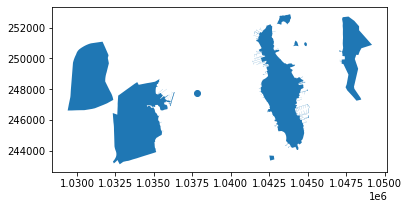

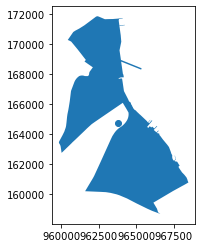

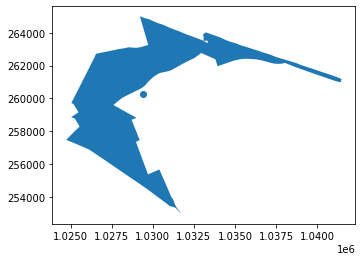

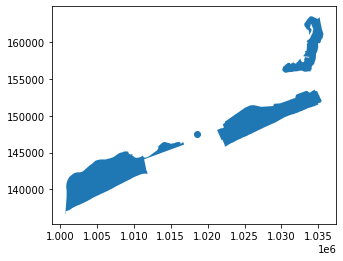

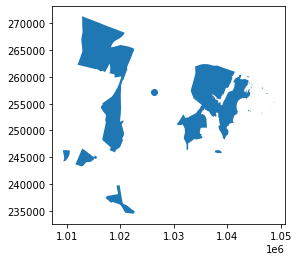

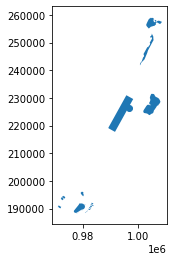

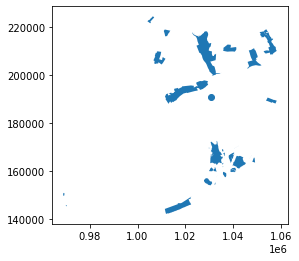

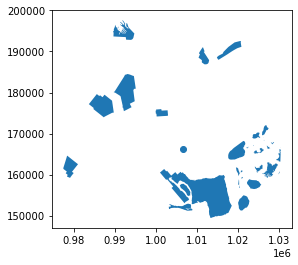

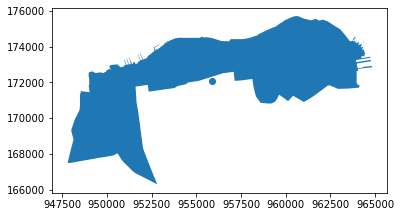

In [87]:
# saving the shape, centroid union as a new name called 'multi_shapes'
multi_shapes = (
    multi_shapes
    .centroid
    .union(multi_shapes['geometry'])
)

# plotting the shapes and their centroids that do not fall within their shape
for i in range(len(multi_shapes)):
    multi_shapes.iloc[[i]].plot()

# 11. Set Operations with Overlay

In [88]:
path = 'https://services5.arcgis.com/GfwWNkhOj9bNBqoJ/arcgis/rest/services/NYC_Neighborhood_Tabulation_Areas_2010\
/FeatureServer/0/query?where=1=1&outFields=*&outSR=4326&f=pgeojson'
nta_shape = gpd.read_file(path)

print('shape of data: {}'.format(nta_shape.shape))
nta_shape.head()

shape of data: (195, 9)


,OBJECTID,BoroCode,BoroName,CountyFIPS,NTACode,NTAName,Shape__Area,Shape__Length,geometry
0,1,4,Queens,081,QN08,St. Albans,7.741276e+07,45401.225082,"POLYGON ((-73.75205 40.70524, -73.75175 40.704..."
1,2,2,Bronx,005,BX28,Van Cortlandt Village,2.566604e+07,21945.694919,"POLYGON ((-73.88705 40.88436, -73.88705 40.884..."
2,3,4,Queens,081,QN55,South Ozone Park,8.246139e+07,36708.169305,"POLYGON ((-73.80577 40.68294, -73.80552 40.682..."
3,4,3,Brooklyn,047,BK40,Windsor Terrace,1.404173e+07,19033.464627,"POLYGON ((-73.98017 40.66116, -73.98021 40.661..."
4,5,3,Brooklyn,047,BK50,Canarsie,8.208973e+07,43703.354933,"MULTIPOLYGON (((-73.88834 40.64672, -73.88835 ..."


In [89]:
# offsetting the nta data 10,000 feet east and north so we can perform overlay operations
# saving as a new column called 'offset'
nta_shape = nta_shape.to_crs(epsg=2263)
nta_shape['offset'] = (
    nta_shape
    .geometry
    .translate(10000, 10000)
)

nta_shape.head()

,OBJECTID,BoroCode,BoroName,CountyFIPS,NTACode,NTAName,Shape__Area,Shape__Length,geometry,offset
0,1,4,Queens,081,QN08,St. Albans,7.741276e+07,45401.225082,"POLYGON ((1052995.809 196310.668, 1053081.292 ...","POLYGON ((1062995.809 206310.668, 1063081.292 ..."
1,2,2,Bronx,005,BX28,Van Cortlandt Village,2.566604e+07,21945.694919,"POLYGON ((1015481.441 261493.600, 1015482.349 ...","POLYGON ((1025481.441 271493.600, 1025482.349 ..."
2,3,4,Queens,081,QN55,South Ozone Park,8.246139e+07,36708.169305,"POLYGON ((1038120.113 188150.104, 1038189.955 ...","POLYGON ((1048120.113 198150.104, 1048189.955 ..."
3,4,3,Brooklyn,047,BK40,Windsor Terrace,1.404173e+07,19033.464627,"POLYGON ((989750.827 180156.637, 989741.211 18...","POLYGON ((999750.827 190156.637, 999741.211 19..."
4,5,3,Brooklyn,047,BK50,Canarsie,8.208973e+07,43703.354933,"MULTIPOLYGON (((1015235.757 174913.308, 101523...","MULTIPOLYGON (((1025235.757 184913.308, 102523..."


Text(0.5, 1.0, 'Offset = 10,000 ft in both x and y directions')

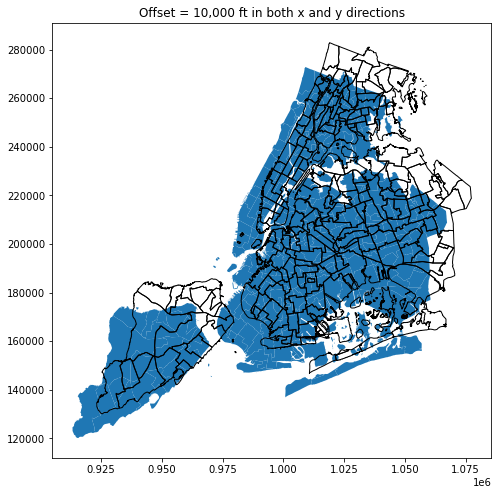

In [90]:
# previewing the new offset shape
fig, ax = plt.subplots(figsize=(8, 8))

nta_shape.plot(ax=ax)

(nta_shape
 .set_geometry('offset')
 .plot(
     ax=ax,
     color='none',
     edgecolor='black')
)

ax.set_title('Offset = 10,000 ft in both x and y directions')

<AxesSubplot:>

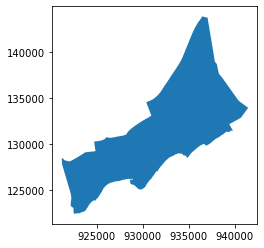

In [91]:
# we will use this nta shape to analyze overlay methods
(nta_shape
 .loc[nta_shape['NTACode'] == 'SI01']
 .plot()
)

In [92]:
nta_shape = nta_shape.loc[nta_shape['NTACode'] == 'SI01']
nta_shape.head()

,OBJECTID,BoroCode,BoroName,CountyFIPS,NTACode,NTAName,Shape__Area,Shape__Length,geometry,offset
150,151,5,Staten Island,085,SI01,Annadale-Huguenot-Prince's Bay-Eltingville,1.411915e+08,71307.034989,"POLYGON ((937062.170 143745.645, 937059.696 14...","POLYGON ((947062.170 153745.645, 947059.696 15..."


In [93]:
offset = nta_shape.set_geometry('offset')
offset.head()

,OBJECTID,BoroCode,BoroName,CountyFIPS,NTACode,NTAName,Shape__Area,Shape__Length,geometry,offset
150,151,5,Staten Island,085,SI01,Annadale-Huguenot-Prince's Bay-Eltingville,1.411915e+08,71307.034989,"POLYGON ((937062.170 143745.645, 937059.696 14...","POLYGON ((947062.170 153745.645, 947059.696 15..."


Text(0.5, 1.0, 'Overlay = None (Original Shapes)')

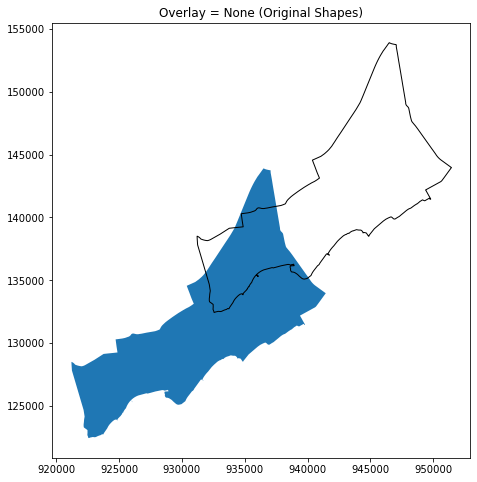

In [94]:
fig, ax = plt.subplots(figsize=(8, 8))

nta_shape.plot(ax=ax)

offset.plot(ax=ax, color='None', edgecolor='black')
ax.set_title('Overlay = None (Original Shapes)')

## 11.1 Union

Text(0.5, 1.0, 'Overlay = Union')

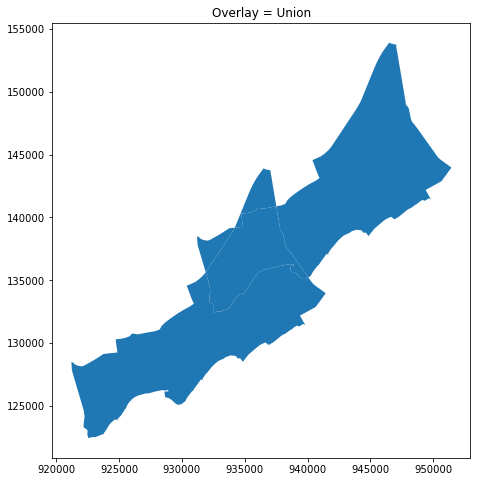

In [95]:
fig, ax = plt.subplots(figsize=(8, 8))

# analyzing union overlay method
union = gpd.overlay(
    nta_shape,
    offset, 
    how='union'
)

union.plot(ax=ax)
ax.set_title('Overlay = Union')

## 11.2 Intersection

Text(0.5, 1.0, 'Overlay = Intersection')

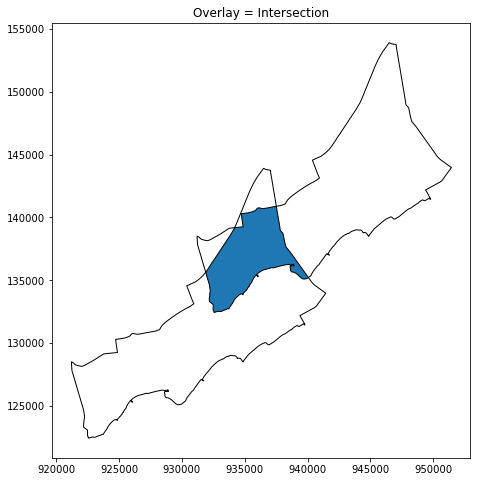

In [96]:
fig, ax = plt.subplots(figsize=(8, 8))

# analyzing the intersection overlay method
intersection = gpd.overlay(
    nta_shape,
    offset, 
    how='intersection'
)

intersection.plot(ax=ax)
offset.plot(ax=ax, color='None', edgecolor='black')
nta_shape.plot(ax=ax, color='None',  edgecolor='black')

ax.set_title('Overlay = Intersection')

## 11.3 Symmetric Difference

Text(0.5, 1.0, 'Overlay = Symmetric Difference')

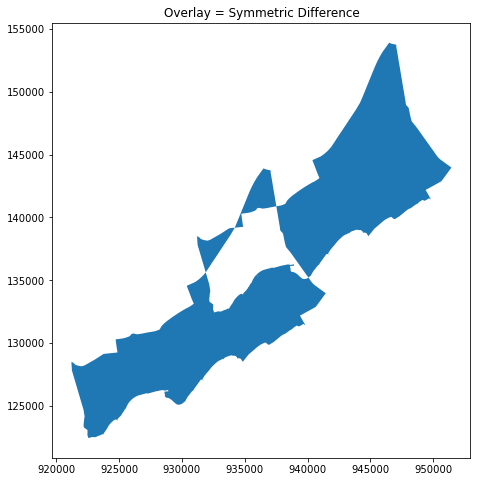

In [97]:
fig, ax = plt.subplots(figsize=(8, 8))

# analyzing the symmetric_difference overlay method
symmetric_difference = gpd.overlay(
    nta_shape,
    offset,
    how='symmetric_difference'
)

symmetric_difference.plot(ax=ax)
ax.set_title('Overlay = Symmetric Difference')

## 11.4 Difference

Text(0.5, 1.0, 'Overlay = Difference')

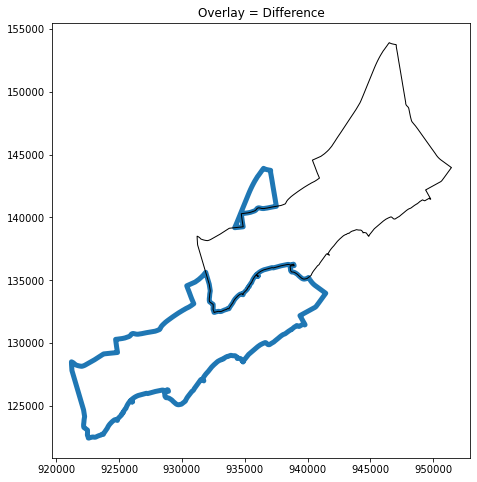

In [98]:
fig, ax = plt.subplots(figsize=(8, 8))

# analyzing the difference overlay method
difference = gpd.overlay(
    nta_shape,
    offset,
    how='difference'
)

difference.plot(ax=ax, color='None', edgecolor='#1f77b4', linewidth=5)
offset.plot(ax=ax, color='None', edgecolor='black', zorder=1)

ax.set_title('Overlay = Difference')

## 11.5 Identity

Text(0.5, 1.0, 'Overlay = Identity')

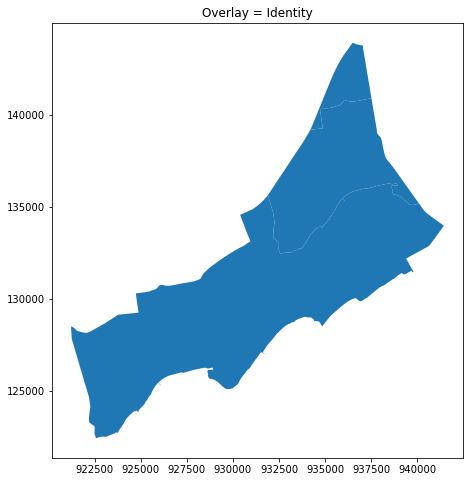

In [99]:
fig, ax = plt.subplots(figsize=(8, 8))

# analyzing the identity overlay method
identity = gpd.overlay(
    nta_shape, 
    offset, 
    how='identity'
)

identity.plot(ax=ax)
ax.set_title('Overlay = Identity')

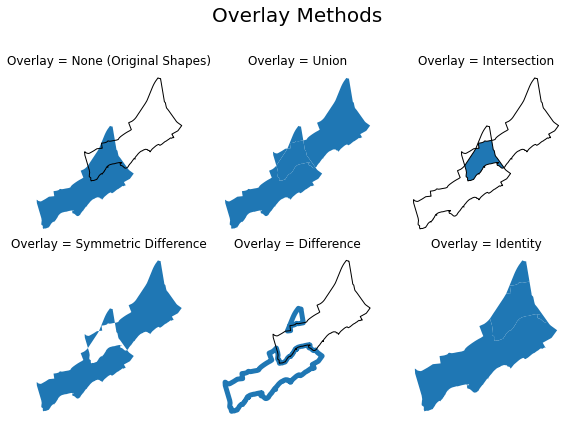

In [100]:
# plotting overlay methods
fig, axs = plt.subplots(2, 3, sharey=False, figsize=(8,6))

nta_shape.plot(ax=axs[0, 0])
offset.plot(ax=axs[0, 0], color='None', edgecolor='black')
axs[0, 0].set_title('Overlay = None (Original Shapes)')
axs[0, 0].axis('off')

union = gpd.overlay(nta_shape, offset, how='union')
union.plot(ax=axs[0, 1])
axs[0, 1].set_title('Overlay = Union')
axs[0, 1].axis('off')

intersection = gpd.overlay(nta_shape, offset, how='intersection')
intersection.plot(ax=axs[0, 2])
offset.plot(ax=axs[0, 2], color='None', edgecolor='black')
nta_shape.plot(ax=axs[0, 2], color='None',  edgecolor='black')
axs[0, 2].set_title('Overlay = Intersection')
axs[0, 2].axis('off')

symmetric_difference = gpd.overlay(nta_shape, offset, how='symmetric_difference')
symmetric_difference.plot(ax=axs[1, 0])
axs[1, 0].set_title('Overlay = Symmetric Difference')
axs[1, 0].axis('off')

difference = gpd.overlay(nta_shape, offset, how='difference')
difference.plot(ax=axs[1, 1], color='None', edgecolor='#1f77b4', linewidth=5)
offset.plot(ax=axs[1, 1], color='None', edgecolor='black', zorder=1)
axs[1, 1].set_title('Overlay = Difference')
axs[1, 1].axis('off')

identity = gpd.overlay(nta_shape, offset, how='identity')
identity.plot(ax=axs[1, 2])
axs[1, 2].set_title('Overlay = Identity')
axs[1, 2].axis('off')

fig.suptitle("Overlay Methods\n", fontsize=20)
fig.tight_layout()

## 11.6 Aggregation with Dissolve

In [101]:
path = 'https://services5.arcgis.com/GfwWNkhOj9bNBqoJ/arcgis/rest/services/NYC_Neighborhood_Tabulation_Areas_2010\
/FeatureServer/0/query?where=1=1&outFields=*&outSR=4326&f=pgeojson'
nta_shape = gpd.read_file(path)

print('shape of data: {}'.format(nta_shape.shape))
nta_shape.head()

shape of data: (195, 9)


,OBJECTID,BoroCode,BoroName,CountyFIPS,NTACode,NTAName,Shape__Area,Shape__Length,geometry
0,1,4,Queens,081,QN08,St. Albans,7.741276e+07,45401.225082,"POLYGON ((-73.75205 40.70524, -73.75175 40.704..."
1,2,2,Bronx,005,BX28,Van Cortlandt Village,2.566604e+07,21945.694919,"POLYGON ((-73.88705 40.88436, -73.88705 40.884..."
2,3,4,Queens,081,QN55,South Ozone Park,8.246139e+07,36708.169305,"POLYGON ((-73.80577 40.68294, -73.80552 40.682..."
3,4,3,Brooklyn,047,BK40,Windsor Terrace,1.404173e+07,19033.464627,"POLYGON ((-73.98017 40.66116, -73.98021 40.661..."
4,5,3,Brooklyn,047,BK50,Canarsie,8.208973e+07,43703.354933,"MULTIPOLYGON (((-73.88834 40.64672, -73.88835 ..."


<AxesSubplot:>

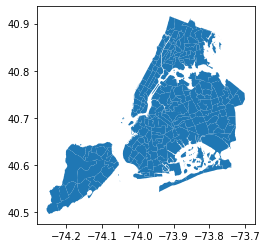

In [102]:
nta_shape.plot()

In [103]:
# dissolving nta shapes by borough
boro = nta_shape.dissolve(by='BoroName')
boro.head()

,geometry,OBJECTID,BoroCode,CountyFIPS,NTACode,NTAName,Shape__Area,Shape__Length
BoroName,,,,,,,,
Bronx,"MULTIPOLYGON (((-73.89920 40.79651, -73.89852 ...",2,2,005,BX28,Van Cortlandt Village,2.566604e+07,21945.694919
Brooklyn,"MULTIPOLYGON (((-73.96082 40.57387, -73.96091 ...",4,3,047,BK40,Windsor Terrace,1.404173e+07,19033.464627
Manhattan,"MULTIPOLYGON (((-74.00860 40.68626, -74.00836 ...",22,1,061,MN06,Manhattanville,1.073480e+07,17357.246743
Queens,"MULTIPOLYGON (((-73.88307 40.56839, -73.88305 ...",1,4,081,QN08,St. Albans,7.741276e+07,45401.225082
Staten Island,"MULTIPOLYGON (((-74.22211 40.50261, -74.22217 ...",25,5,085,SI11,Charleston-Richmond Valley-Tottenville,1.455343e+08,84980.495369


<AxesSubplot:>

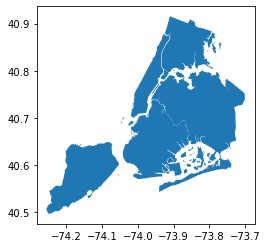

In [104]:
boro.plot()

# 12. Additional Attributes and Methods

## 12.1 Unary Predicates

In [105]:
(nta_shape
 .geometry
 .is_empty
 .value_counts()
)

False    195
dtype: int64

In [106]:
(nta_shape
 .geometry
 .isnull()
 .value_counts()
)

False    195
Name: geometry, dtype: int64

In [107]:
(nta_shape['geometry']
 .is_simple
 .value_counts()
)

True    195
dtype: int64

## 12.2 Binary Predicates

In [108]:
path = 'https://services5.arcgis.com/GfwWNkhOj9bNBqoJ/arcgis/rest/services/NYC_Neighborhood_Tabulation_Areas_2010\
/FeatureServer/0/query?where=1=1&outFields=*&outSR=4326&f=pgeojson'
nta_shape = gpd.read_file(path)

nta_shape = nta_shape.to_crs(epsg=2263)

print(nta_shape.shape)
nta_shape.head()

(195, 9)


,OBJECTID,BoroCode,BoroName,CountyFIPS,NTACode,NTAName,Shape__Area,Shape__Length,geometry
0,1,4,Queens,081,QN08,St. Albans,7.741276e+07,45401.225082,"POLYGON ((1052995.809 196310.668, 1053081.292 ..."
1,2,2,Bronx,005,BX28,Van Cortlandt Village,2.566604e+07,21945.694919,"POLYGON ((1015481.441 261493.600, 1015482.349 ..."
2,3,4,Queens,081,QN55,South Ozone Park,8.246139e+07,36708.169305,"POLYGON ((1038120.113 188150.104, 1038189.955 ..."
3,4,3,Brooklyn,047,BK40,Windsor Terrace,1.404173e+07,19033.464627,"POLYGON ((989750.827 180156.637, 989741.211 18..."
4,5,3,Brooklyn,047,BK50,Canarsie,8.208973e+07,43703.354933,"MULTIPOLYGON (((1015235.757 174913.308, 101523..."


### 12.2.1 Centroids vs. Representative Points

In [109]:
(nta_shape
 .centroid
 .geom_almost_equals(nta_shape.centroid)
 .value_counts()
)

True    195
dtype: int64

In [110]:
# an nta's shape centroid does not equal their representative point
(nta_shape
 .centroid
 .geom_almost_equals(nta_shape.representative_point())
 .value_counts()
)

/Users/markbauer/opt/anaconda3/envs/geopandas_env/lib/python3.8/site-packages/geopandas/array.py:524: ShapelyDeprecationWarning: The array interface is deprecated and will no longer work in Shapely 2.0. Convert the '.coords' to a numpy array instead.
  return GeometryArray(vectorized.representative_point(self.data), crs=self.crs)


False    195
dtype: int64

/Users/markbauer/opt/anaconda3/envs/geopandas_env/lib/python3.8/site-packages/geopandas/array.py:524: ShapelyDeprecationWarning: The array interface is deprecated and will no longer work in Shapely 2.0. Convert the '.coords' to a numpy array instead.
  return GeometryArray(vectorized.representative_point(self.data), crs=self.crs)


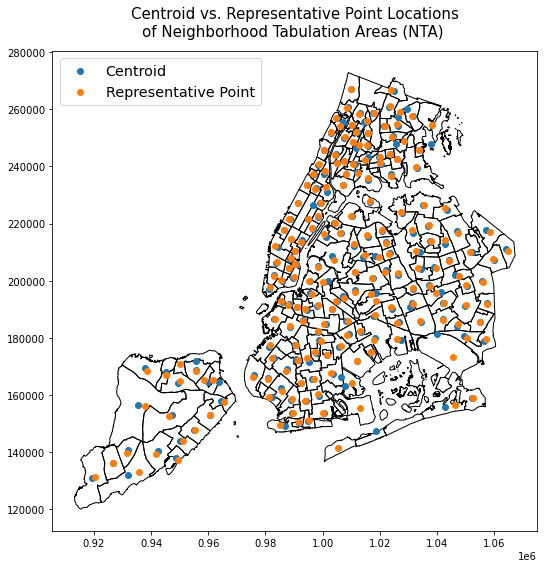

In [111]:
fig, ax = plt.subplots(figsize=(8, 8))

nta_shape.plot(
    ax=ax, 
    color='none', 
    edgecolor='black'
)

nta_shape.centroid.plot(
    ax=ax, 
    label='Centroid'
)

(nta_shape
 .representative_point()
 .plot(ax=ax, label='Representative Point')
)

ax.legend(loc=2, fontsize='x-large')
ax.set_title(
    'Centroid vs. Representative Point Locations\nof Neighborhood Tabulation Areas (NTA) ', 
    fontsize=15, pad=15
)

plt.tight_layout()

## 12.3 Constructive Methods

In [112]:
path = 'https://services5.arcgis.com/GfwWNkhOj9bNBqoJ/arcgis/rest/services/NYC_Neighborhood_Tabulation_Areas_2010\
/FeatureServer/0/query?where=1=1&outFields=*&outSR=4326&f=pgeojson'
nta_shape = gpd.read_file(path)

nta_shape = nta_shape.to_crs(epsg=2263)

print(nta_shape.shape)
nta_shape.head()

(195, 9)


,OBJECTID,BoroCode,BoroName,CountyFIPS,NTACode,NTAName,Shape__Area,Shape__Length,geometry
0,1,4,Queens,081,QN08,St. Albans,7.741276e+07,45401.225082,"POLYGON ((1052995.809 196310.668, 1053081.292 ..."
1,2,2,Bronx,005,BX28,Van Cortlandt Village,2.566604e+07,21945.694919,"POLYGON ((1015481.441 261493.600, 1015482.349 ..."
2,3,4,Queens,081,QN55,South Ozone Park,8.246139e+07,36708.169305,"POLYGON ((1038120.113 188150.104, 1038189.955 ..."
3,4,3,Brooklyn,047,BK40,Windsor Terrace,1.404173e+07,19033.464627,"POLYGON ((989750.827 180156.637, 989741.211 18..."
4,5,3,Brooklyn,047,BK50,Canarsie,8.208973e+07,43703.354933,"MULTIPOLYGON (((1015235.757 174913.308, 101523..."


### 12.3.1 Buffer

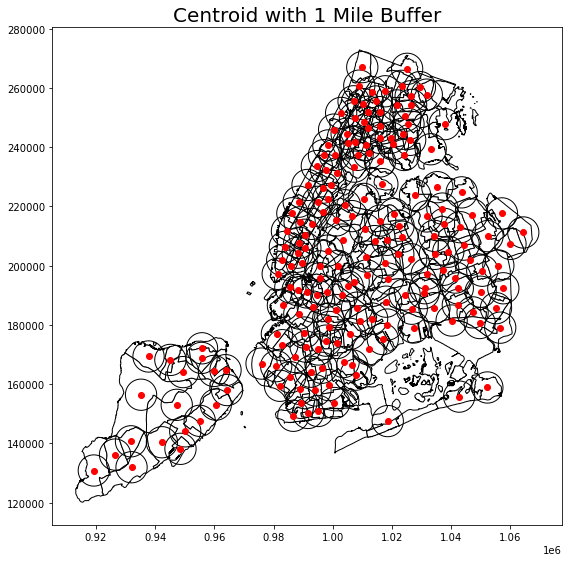

In [113]:
fig, ax = plt.subplots(figsize=(8, 8)) # creating a figure

# plotting a one mile radius buffer of the nta centroid
(nta_shape
 .centroid
 .buffer(5280)
 .plot(ax=ax, color='none', edgecolor='black')
)

(nta_shape
 .centroid
 .plot(ax=ax, color='red', edgecolor='red')
)

nta_shape.plot(
    ax=ax,
    color='white', 
    edgecolor='black', 
    zorder=0
)

ax.set_title('Centroid with 1 Mile Buffer', fontsize=20)
fig.tight_layout()

### 12.3.2 Translate/Offset

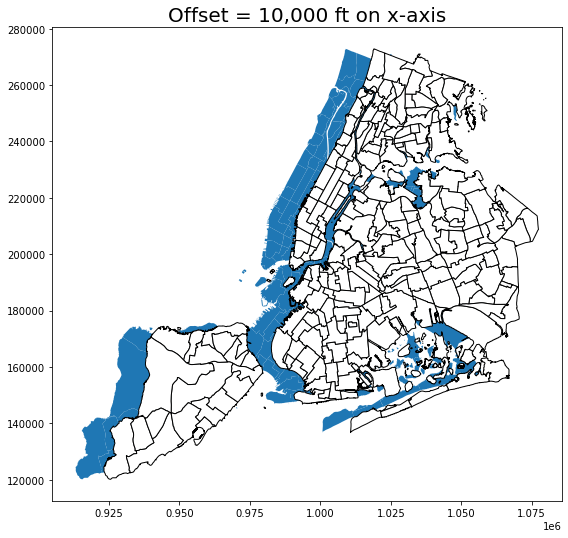

In [114]:
fig, ax = plt.subplots(figsize=(8, 8))

# offset the nta shapes 10,000 feet to the right along the x-axis.
(nta_shape
 .translate(10000)
 .plot(ax=ax, color='white', edgecolor='black')
)

nta_shape.plot(
    ax=ax, 
    zorder=0
)

ax.set_title('Offset = 10,000 ft on x-axis', fontsize=20)
fig.tight_layout()

# 13. Conclusion

In this notebook, we reviewed how to work with geospatial data and create various types of maps with the Python library geopandas.